Import packages

In [1]:
import cf,cfplot as cfp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import pandas as pd
import datetime
from netCDF4 import Dataset, num2date, date2num
import glob
import os
import xarray as xr
import cftime
from itertools import chain
import scipy as sp

Importing Sea Level Pressure multi-model means (time average from period after initial 50 years)

In [2]:
slp_base_mmm = cf.read_field("/nfs/annie/eewjd/PDRMIP_tm_fin50_rg/base/tm_fin50_mmm_b_psl_rg_tp.nc")
slp_bc10_mmm = cf.read_field("/nfs/annie/eewjd/PDRMIP_tm_fin50_rg/bc10/tm_fin50_mmm_bc10_psl_rg_tp.nc")
slp_s5_mmm = cf.read_field("/nfs/annie/eewjd/PDRMIP_tm_fin50_rg/s5/tm_fin50_mmm_s5_psl_rg_tp.nc")
slp_bc10a_mmm = cf.read_field("/nfs/annie/eewjd/PDRMIP_tm_fin50_rg/bc10a/tm_fin50_mmm_bc10a_psl_rg_tp.nc")
slp_s10a_mmm = cf.read_field("/nfs/annie/eewjd/PDRMIP_tm_fin50_rg/s10a/tm_fin50_mmm_s10a_psl_rg_tp.nc")
slp_s10e_mmm = cf.read_field("/nfs/annie/eewjd/PDRMIP_tm_fin50_rg/s10e/tm_fin50_mmm_s10e_psl_rg_tp.nc")
slp_sr_mmm = cf.read_field("/nfs/annie/eewjd/PDRMIP_tm_fin50_rg/sr/tm_fin50_mmm_sr_psl_rg_tp.nc")
slp_sar_mmm = cf.read_field("/nfs/annie/eewjd/PDRMIP_tm_fin50_rg/sar/tm_fin50_mmm_sar_psl_rg_tp.nc")

Importing Sea Level Pressure multi-model means

In [3]:
t100_slp_base_mmm = cf.read_field("/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/base/t100_mmm_b_psl_rg_tp.nc")
t100_slp_bc10_mmm = cf.read_field("/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/bc10/t100_mmm_bc10_psl_rg_tp_test.nc")
t100_slp_s5_mmm = cf.read_field("/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s5/t100_mmm_s5_psl_rg_tp_test.nc")
t100_slp_bc10a_mmm = cf.read_field("/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/bc10a/t100_mmm_bc10a_psl_rg_tp.nc")
t100_slp_s10a_mmm = cf.read_field("/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s10a/t100_mmm_s10a_psl_rg_tp.nc")
t100_slp_s10e_mmm = cf.read_field("/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s10e/t100_mmm_s10e_psl_rg_tp.nc")
t100_slp_sr_mmm = cf.read_field("/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/sr/t100_mmm_sr_psl_rg_tp.nc")
t100_slp_sar_mmm = cf.read_field("/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/sar/t100_mmm_sar_psl_rg_tp.nc")

/nfs/see-fs-02_users/eewjd/anaconda2/lib/python2.7/site-packages/cf/data/partitionmatrix.py:463: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_matrix[new_indices] = matrix[indices]


Importing Sea Level Pressure models for each experiment

In [5]:
#Base
t100_canesm2_b_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/base/t100_canesm2_b_psl_rg_tp.nc')
t100_mpiesm_b_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/base/t100_mpiesm_b_psl_rg_tp.nc')
t100_noresm1_b_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/base/t100_noresm1_b_psl_rg_tp.nc')
t100_cesm1cam4_b_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/base/t100_cesm1cam4_b_psl_rg_tp.nc')
t100_cesm1cam5_b_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/base/t100_cesm1cam5_b_psl_rg_tp.nc')
t100_sprintars_b_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/base/t100_sprintars_b_psl_rg_tp.nc')
t100_hadgem2_b_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/base/t100_hadgem2_b_psl_rg_tp.nc')
#t100_hadgem3_b_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/base/t100_hadgem3_b_psl_rg_tp.nc')
t100_giss_b_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/base/t100_giss_b_psl_rg_tp.nc')
t100_ipsl_b_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/base/t100_ipsl_b_psl_rg_tp.nc')
t100_echam_b_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/base/t100_echam_b_psl_rg_tp.nc')

#BCx10
t100_canesm2_bc10_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/bc10/t100_canesm2_bc10_psl_rg_tp.nc')
#t100_mpiesm_bc10_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/bc10/t100_mpiesm_bc10_psl_rg_tp')
t100_noresm1_bc10_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/bc10/t100_noresm1_bc10_psl_rg_tp')
t100_cesm1cam4_bc10_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/bc10/t100_cesm1cam4_bc10_psl_rg_tp')
t100_cesm1cam5_bc10_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/bc10/t100_cesm1cam5_bc10_psl_rg_tp')
t100_sprintars_bc10_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/bc10/t100_sprintars_bc10_psl_rg_tp')
t100_hadgem2_bc10_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/bc10/t100_hadgem2_bc10_psl_rg_tp')
#t100_hadgem3_bc10_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/bc10/t100_hadgem3_bc10_psl_rg_tp')
t100_giss_bc10_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/bc10/t100_giss_bc10_psl_rg_tp')
t100_ipsl_bc10_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/bc10/t100_ipsl_bc10_psl_rg_tp')
t100_echam_bc10_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/bc10/t100_echam_bc10_psl_rg_tp')

#Sulx5
t100_canesm2_s5_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s5/t100_canesm2_s5_psl_rg_tp.nc')
#t100_mpiesm_s5_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s5/t100_mpiesm_s5_psl_rg_tp.nc')
t100_noresm1_s5_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s5/t100_noresm1_s5_psl_rg_tp.nc')
t100_cesm1cam4_s5_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s5/t100_cesm1cam4_s5_psl_rg_tp.nc')
t100_cesm1cam5_s5_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s5/t100_cesm1cam5_s5_psl_rg_tp.nc')
t100_sprintars_s5_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s5/t100_sprintars_s5_psl_rg_tp.nc')
t100_hadgem2_s5_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s5/t100_hadgem2_s5_psl_rg_tp.nc')
#t100_hadgem3_s5_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s5/t100_hadgem3_s5_psl_rg_tp.nc')
t100_giss_s5_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s5/t100_giss_s5_psl_rg_tp.nc')
t100_ipsl_s5_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s5/t100_ipsl_s5_psl_rg_tp.nc')
#t100_echam_s5_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s5/t100_echam_s5_psl_rg_tp.nc')

#BC10a
#t100_canesm2_bc10a_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/bc10a/t100_canesm2_bc10a_psl_rg_tp.nc')
#t100_mpiesm_bc10a_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/bc10a/t100_mpiesm_bc10a_psl_rg_tp.nc')
t100_noresm1_bc10a_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/bc10a/t100_noresm1_bc10a_psl_rg_tp.nc')
#t100_cesm1cam4_bc10a_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/bc10a/t100_cesm1cam4_bc10a_psl_rg_tp.nc')
t100_cesm1cam5_bc10a_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/bc10a/t100_cesm1cam5_bc10a_psl_rg_tp.nc')
t100_sprintars_bc10a_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/bc10a/t100_sprintars_bc10a_psl_rg_tp.nc')
#t100_hadgem2_bc10a_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/bc10a/t100_hadgem2_bc10a_psl_rg_tp.nc')
#t100_hadgem3_bc10a_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/bc10a/t100_hadgem3_bc10a_psl_rg_tp.nc')
t100_giss_bc10a_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/bc10a/t100_giss_bc10a_psl_rg_tp.nc')
t100_ipsl_bc10a_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/bc10a/t100_ipsl_bc10a_psl_rg_tp.nc')
#t100_echam_bc10a_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/bc10a/t100_echam_bc10a_psl_rg_tp.nc')

#Sul10a
#t100_canesm2_s10a_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s10a/t100_canesm2_s10a_psl_rg_tp.nc')
#t100_mpiesm_s10a_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s10a/t100_mpiesm_s10a_psl_rg_tp.nc')
t100_noresm1_s10a_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s10a/t100_noresm1_s10a_psl_rg_tp.nc')
t100_cesm1cam4_s10a_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s10a/t100_cesm1cam4_s10a_psl_rg_tp.nc')
t100_cesm1cam5_s10a_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s10a/t100_cesm1cam5_s10a_psl_rg_tp.nc')
t100_sprintars_s10a_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s10a/t100_sprintars_s10a_psl_rg_tp.nc')
#t100_hadgem2_s10a_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s10a/t100_hadgem2_s10a_psl_rg_tp.nc')
#t100_hadgem3_s10a_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s10a/t100_hadgem3_s10a_psl_rg_tp.nc')
t100_giss_s10a_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s10a/t100_giss_s10a_psl_rg_tp.nc')
t100_ipsl_s10a_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s10a/t100_ipsl_s10a_psl_rg_tp.nc')
#t100_echam_s10a_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s10a/t100_echam_s10a_psl_rg_tp.nc')

#Sul10e
#t100_canesm2_s10e_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s10e/t100_canesm2_s10e_psl_rg_tp.nc')
#t100_mpiesm_s10e_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s10e/t100_mpiesm_s10e_psl_rg_tp.nc')
t100_noresm1_s10e_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s10e/t100_noresm1_s10e_psl_rg_tp.nc')
t100_cesm1cam4_s10e_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s10e/t100_cesm1cam4_s10e_psl_rg_tp.nc')
t100_cesm1cam5_s10e_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s10e/t100_cesm1cam5_s10e_psl_rg_tp.nc')
t100_sprintars_s10e_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s10e/t100_sprintars_s10e_psl_rg_tp.nc')
#t100_hadgem2_s10e_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s10e/t100_hadgem2_s10e_psl_rg_tp.nc')
#t100_hadgem3_s10e_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s10e/t100_hadgem3_s10e_psl_rg_tp.nc')
t100_giss_s10e_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s10e/t100_giss_s10e_psl_rg_tp.nc')
t100_ipsl_s10e_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s10e/t100_ipsl_s10e_psl_rg_tp.nc')
#t100_echam_s10e_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/s10e/t100_echam_s10e_psl_rg_tp.nc')

#Sulred
#t100_canesm2_sr_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/sr/t100_canesm2_sr_psl_rg_tp.nc')
#t100_mpiesm_sr_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/sr/t100_mpiesm_sr_psl_rg_tp.nc')
#t100_noresm1_sr_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/sr/t100_noresm1_sr_psl_rg_tp.nc')
#t100_cesm1cam4_sr_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/sr/t100_cesm1cam4_sr_psl_rg_tp.nc')
#t100_cesm1cam5_sr_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/sr/t100_cesm1cam5_sr_psl_rg_tp.nc')
t100_sprintars_sr_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/sr/t100_sprintars_sr_psl_rg_tp.nc')
#t100_hadgem2_sr_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/sr/t100_hadgem2_sr_psl_rg_tp.nc')
#t100_hadgem3_sr_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/sr/t100_hadgem3_sr_psl_rg_tp.nc')
#t100_giss_sr_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/sr/t100_giss_sr_psl_rg_tp.nc')
#t100_ipsl_sr_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/sr/t100_ipsl_sr_psl_rg_tp.nc')
#t100_echam_sr_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/sr/t100_echam_sr_psl_rg_tp.nc')

#Sulasiared
#t100_canesm2_sar_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/sar/t100_canesm2_sar_psl_rg_tp.nc')
#t100_mpiesm_sar_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/sar/t100_mpiesm_sar_psl_rg_tp.nc')
#t100_noresm1_sar_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/sar/t100_noresm1_sar_psl_rg_tp.nc')
#t100_cesm1cam4_sar_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/sar/t100_cesm1cam4_sar_psl_rg_tp.nc')
#t100_cesm1cam5_sar_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/sar/t100_cesm1cam5_sar_psl_rg_tp.nc')
t100_sprintars_sar_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/sar/t100_sprintars_sar_psl_rg_tp.nc')
#t100_hadgem2_sar_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/sar/t100_hadgem2_sar_psl_rg_tp.nc')
#t100_hadgem3_sar_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/sar/t100_hadgem3_sar_psl_rg_tp.nc')
#t100_giss_sar_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/sar/t100_giss_sar_psl_rg_tp.nc')
#t100_ipsl_sar_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/sar/t100_ipsl_sar_psl_rg_tp.nc')
#t100_echam_sar_psl = cf.read_field('/nfs/annie/eewjd/PDRMIP/slp/t_100/regrids/sar/t100_echam_sar_psl_rg_tp.nc')


Dictionary containing multi-model means over 100yrs - Sea Level Pressure

In [6]:
t100_slp_mmms_dict = {
    "t100_slp_base_mmm": t100_slp_base_mmm,
    "t100_slp_bc10_mmm": t100_slp_bc10_mmm,
    "t100_slp_s5_mmm": t100_slp_s5_mmm,
    "t100_slp_bc10a_mmm": t100_slp_bc10a_mmm,
    "t100_slp_s10a_mmm": t100_slp_s10a_mmm,
    "t100_slp_s10e_mmm": t100_slp_s10e_mmm,
    "t100_slp_sr_mmm": t100_slp_sr_mmm,
    "t100_slp_sar_mmm": t100_slp_sar_mmm,
}

Dictionary containing models over 100 years - Sea Level Pressure

In [7]:
t100_slp_base_dict = {
    "t100_canesm2_b_psl": t100_canesm2_b_psl,
    "t100_mpiesm_b_psl": t100_mpiesm_b_psl,
    "t100_noresm1_b_psl": t100_noresm1_b_psl,
    "t100_cesm1cam4_b_psl": t100_cesm1cam4_b_psl,
    "t100_cesm1cam5_b_psl": t100_cesm1cam5_b_psl,
    "t100_sprintars_b_psl": t100_sprintars_b_psl,
    "t100_hadgem2_b_psl": t100_hadgem2_b_psl,
    #"t100_hadgem3_b_psl": t100_hadgem3_b_psl,
    "t100_giss_b_psl": t100_giss_b_psl,
    "t100_ipsl_b_psl": t100_ipsl_b_psl,
    "t100_echam_b_psl": t100_echam_b_psl,
}


t100_slp_bc10_dict = {
    "t100_canesm2_bc10_psl": t100_canesm2_bc10_psl,
    #"t100_mpiesm_bc10_psl": t100_mpiesm_bc10_psl,
    "t100_noresm1_bc10_psl": t100_noresm1_bc10_psl,
    "t100_cesm1cam4_bc10_psl": t100_cesm1cam4_bc10_psl,
    "t100_cesm1cam5_bc10_psl": t100_cesm1cam5_bc10_psl,
    "t100_sprintars_bc10_psl": t100_sprintars_bc10_psl,
    "t100_hadgem2_bc10_psl": t100_hadgem2_bc10_psl,
    #"t100_hadgem3_bc10_psl": t100_hadgem3_bc10_psl,
    "t100_giss_bc10_psl": t100_giss_bc10_psl,
    "t100_ipsl_bc10_psl": t100_ipsl_bc10_psl,
    "t100_echam_bc10_psl": t100_echam_bc10_psl,
}

t100_slp_s5_dict = {
    "t100_canesm2_s5_psl": t100_canesm2_s5_psl,
    #"t100_mpiesm_s5_psl": t100_mpiesm_s5_psl,
    "t100_noresm1_s5_psl": t100_noresm1_s5_psl,
    "t100_cesm1cam4_s5_psl": t100_cesm1cam4_s5_psl,
    "t100_cesm1cam5_s5_psl": t100_cesm1cam5_s5_psl,
    "t100_sprintars_s5_psl": t100_sprintars_s5_psl,
    "t100_hadgem2_s5_psl": t100_hadgem2_s5_psl,
    #"t100_hadgem3_s5_psl": t100_hadgem3_s5_psl,
    "t100_giss_s5_psl": t100_giss_s5_psl,
    "t100_ipsl_s5_psl": t100_ipsl_s5_psl,
    #"t100_echam_s5_psl": t100_echam_s5_psl,
}

t100_slp_bc10a_dict = {
    #"t100_canesm2_bc10a_psl": t100_canesm2_bc10a_psl,
    #"t100_mpiesm_bc10a_psl": t100_mpiesm_bc10a_psl,
    "t100_noresm1_bc10a_psl": t100_noresm1_bc10a_psl,
    #"t100_cesm1cam4_bc10a_psl": t100_cesm1cam4_bc10a_psl,
    "t100_cesm1cam5_bc10a_psl": t100_cesm1cam5_bc10a_psl,
    "t100_sprintars_bc10a_psl": t100_sprintars_bc10a_psl,
    #"t100_hadgem2_bc10a_psl": t100_hadgem2_bc10a_psl,
    #"t100_hadgem3_bc10a_psl": t100_hadgem3_bc10a_psl,
    "t100_giss_bc10a_psl": t100_giss_bc10a_psl,
    "t100_ipsl_bc10a_psl": t100_ipsl_bc10a_psl,
    #"t100_echam_bc10a_psl": t100_echam_bc10a_psl,
}


t100_slp_s10a_dict = {
    #"t100_canesm2_s10a_psl": t100_canesm2_s10a_psl,
    #"t100_mpiesm_s10a_psl": t100_mpiesm_s10a_psl,
    "t100_noresm1_s10a_psl": t100_noresm1_s10a_psl,
    "t100_cesm1cam4_s10a_psl": t100_cesm1cam4_s10a_psl,
    "t100_cesm1cam5_s10a_psl": t100_cesm1cam5_s10a_psl,
    "t100_sprintars_s10a_psl": t100_sprintars_s10a_psl,
    #"t100_hadgem2_s10a_psl": t100_hadgem2_s10a_psl,
    #"t100_hadgem3_s10a_psl": t100_hadgem3_s10a_psl,
    "t100_giss_s10a_psl": t100_giss_s10a_psl,
    "t100_ipsl_s10a_psl": t100_ipsl_s10a_psl,
    #"t100_echam_s10a_psl": t100_echam_s10a_psl,
}

t100_slp_s10e_dict = {
    #"t100_canesm2_s10e_psl": t100_canesm2_s10e_psl,
    #"t100_mpiesm_s10e_psl": t100_mpiesm_s10e_psl,
    "t100_noresm1_s10e_psl": t100_noresm1_s10e_psl,
    "t100_cesm1cam4_s10e_psl": t100_cesm1cam4_s10e_psl,
    "t100_cesm1cam5_s10e_psl": t100_cesm1cam5_s10e_psl,
    "t100_sprintars_s10e_psl": t100_sprintars_s10e_psl,
    #"t100_hadgem2_s10e_psl": t100_hadgem2_s10e_psl,
    #"t100_hadgem3_s10e_psl": t100_hadgem3_s10e_psl,
    "t100_giss_s10e_psl": t100_giss_s10e_psl,
    "t100_ipsl_s10e_psl": t100_ipsl_s10e_psl,
    #"t100_echam_s10e_psl": t100_echam_s10e_psl,
}

t100_slp_sr_dict = {
    #"t100_canesm2_sr_psl": t100_canesm2_sr_psl,
    #"t100_mpiesm_sr_psl": t100_mpiesm_sr_psl,
    #"t100_noresm1_sr_psl": t100_noresm1_sr_psl,
    #"t100_cesm1cam4_sr_psl": t100_cesm1cam4_sr_psl,
    #"t100_cesm1cam5_sr_psl": t100_cesm1cam5_sr_psl,
    "t100_sprintars_sr_psl": t100_sprintars_sr_psl,
    #"t100_hadgem2_sr_psl": t100_hadgem2_sr_psl,
    #"t100_hadgem3_sr_psl": t100_hadgem3_sr_psl,
    #"t100_giss_sr_psl": t100_giss_sr_psl,
    #"t100_ipsl_sr_psl": t100_ipsl_sr_psl,
    #"t100_echam_sr_psl": t100_echam_sr_psl,
}

t100_slp_sar_dict = {
    #"t100_canesm2_sar_psl": t100_canesm2_sar_psl,
    #"t100_mpiesm_sar_psl": t100_mpiesm_sar_psl,
    #"t100_noresm1_sar_psl": t100_noresm1_sar_psl,
    #"t100_cesm1cam4_sar_psl": t100_cesm1cam4_sar_psl,
    #"t100_cesm1cam5_sar_psl": t100_cesm1cam5_sar_psl,
    "t100_sprintars_sar_psl": t100_sprintars_sar_psl,
    #"t100_hadgem2_sar_psl": t100_hadgem2_sar_psl,
    #"t100_hadgem3_sar_psl": t100_hadgem3_sar_psl,
    #"t100_giss_sar_psl": t100_giss_sar_psl,
    #"t100_ipsl_sar_psl": t100_ipsl_sar_psl,
    #"t100_echam_sar_psl": t100_echam_sar_psl,
}

Extracting data within the Aleutian Low Region - defined as 160-220 deg E, 30-65 deg N

for all the cf-fields, 
subspace the data to within the region defined as the Aleutian Low
and create a renamed field that only includes Aleutian Low data

In [8]:
#wa = weighted average, AL = Aleutian Low, t100 = 100-years
#the output from the for loop will produce a dictionary containing a 1-D time series containing the weighted average of the 
#sea-level pressure within the region defined as the Aleutian Low

wa_AL_t100_slp_mmms_dict = {}
wa_AL_t100_slp_base_dict = {}
wa_AL_t100_slp_bc10_dict = {}
wa_AL_t100_slp_s5_dict = {}
wa_AL_t100_slp_bc10a_dict = {}
wa_AL_t100_slp_s10a_dict = {}
wa_AL_t100_slp_s10e_dict = {}
wa_AL_t100_slp_sr_dict = {}
wa_AL_t100_slp_sar_dict = {}

global_mmm = 101155.558

for run in t100_slp_mmms_dict:
    value = t100_slp_mmms_dict[run]
    new_name = "wa_AL_" + run
    x = value.subspace(longitude=cf.wi(160,220))
    y = x.subspace(latitude=cf.wi(30,65))
    z = y.collapse('area: mean', weights='area')
    q = z.squeeze(axes=1)
    q = q - global_mmm
    wa_AL_t100_slp_mmms_dict.update({new_name:q})
    
for run in t100_slp_base_dict:
    value = t100_slp_base_dict[run]
    new_name = "wa_AL_" + run
    x = value.subspace(longitude=cf.wi(160,220))
    y = x.subspace(latitude=cf.wi(30,65))
    z = y.collapse('area: mean', weights='area')
    q = z.squeeze(axes=1)
    q = q - global_mmm
    wa_AL_t100_slp_base_dict.update({new_name:q})

for run in t100_slp_bc10_dict:
    value = t100_slp_bc10_dict[run]
    new_name = "wa_AL_" + run
    x = value.subspace(longitude=cf.wi(160,220))
    y = x.subspace(latitude=cf.wi(30,65))
    z = y.collapse('area: mean', weights='area')
    q = z.squeeze(axes=1)
    q = q - global_mmm
    wa_AL_t100_slp_bc10_dict.update({new_name:q})
    
for run in t100_slp_s5_dict:
    value = t100_slp_s5_dict[run]
    new_name = "wa_AL_" + run
    x = value.subspace(longitude=cf.wi(160,220))
    y = x.subspace(latitude=cf.wi(30,65))
    z = y.collapse('area: mean', weights='area')
    q = z.squeeze(axes=1)
    q = q - global_mmm
    wa_AL_t100_slp_s5_dict.update({new_name:q})

for run in t100_slp_bc10a_dict:
    value = t100_slp_bc10a_dict[run]
    new_name = "wa_AL_" + run
    x = value.subspace(longitude=cf.wi(160,220))
    y = x.subspace(latitude=cf.wi(30,65))
    z = y.collapse('area: mean', weights='area')
    q = z.squeeze(axes=1)
    q = q - global_mmm
    wa_AL_t100_slp_bc10a_dict.update({new_name:q})
    
for run in t100_slp_s10a_dict:
    value = t100_slp_s10a_dict[run]
    new_name = "wa_AL_" + run
    x = value.subspace(longitude=cf.wi(160,220))
    y = x.subspace(latitude=cf.wi(30,65))
    z = y.collapse('area: mean', weights='area')
    q = z.squeeze(axes=1)
    q = q - global_mmm
    wa_AL_t100_slp_s10a_dict.update({new_name:q})
    
for run in t100_slp_s10e_dict:
    value = t100_slp_s10e_dict[run]
    new_name = "wa_AL_" + run
    x = value.subspace(longitude=cf.wi(160,220))
    y = x.subspace(latitude=cf.wi(30,65))
    z = y.collapse('area: mean', weights='area')
    q = z.squeeze(axes=1)
    q = q - global_mmm
    wa_AL_t100_slp_s10e_dict.update({new_name:q})
    
for run in t100_slp_s10e_dict:
    value = t100_slp_s10e_dict[run]
    new_name = "wa_AL_" + run
    x = value.subspace(longitude=cf.wi(160,220))
    y = x.subspace(latitude=cf.wi(30,65))
    z = y.collapse('area: mean', weights='area')
    q = z.squeeze(axes=1)
    q = q - global_mmm
    wa_AL_t100_slp_s10e_dict.update({new_name:q})
    
for run in t100_slp_sr_dict:
    value = t100_slp_sr_dict[run]
    new_name = "wa_AL_" + run
    x = value.subspace(longitude=cf.wi(160,220))
    y = x.subspace(latitude=cf.wi(30,65))
    z = y.collapse('area: mean', weights='area')
    q = z.squeeze(axes=1)
    q = q - global_mmm
    wa_AL_t100_slp_sr_dict.update({new_name:q})   
    
for run in t100_slp_sar_dict:
    value = t100_slp_sar_dict[run]
    new_name = "wa_AL_" + run
    x = value.subspace(longitude=cf.wi(160,220))
    y = x.subspace(latitude=cf.wi(30,65))
    z = y.collapse('area: mean', weights='area')
    q = z.squeeze(axes=1)
    q = q - global_mmm
    wa_AL_t100_slp_sar_dict.update({new_name:q})      
    

Extracting from dictionary 

In [9]:
#in order for future manipulation, I have extracted from the dictionary. Probably not necessary, but have done
#given my current level of python proficiency.

#Multi-model means
wa_AL_t100_slp_base_mmm = wa_AL_t100_slp_mmms_dict['wa_AL_t100_slp_base_mmm']
wa_AL_t100_slp_bc10_mmm = wa_AL_t100_slp_mmms_dict['wa_AL_t100_slp_bc10_mmm']
wa_AL_t100_slp_s5_mmm = wa_AL_t100_slp_mmms_dict['wa_AL_t100_slp_s5_mmm']
wa_AL_t100_slp_bc10a_mmm = wa_AL_t100_slp_mmms_dict['wa_AL_t100_slp_bc10a_mmm']
wa_AL_t100_slp_s10a_mmm = wa_AL_t100_slp_mmms_dict['wa_AL_t100_slp_s10a_mmm']
wa_AL_t100_slp_s10e_mmm = wa_AL_t100_slp_mmms_dict['wa_AL_t100_slp_s10e_mmm']
wa_AL_t100_slp_sr_mmm = wa_AL_t100_slp_mmms_dict['wa_AL_t100_slp_sr_mmm']
wa_AL_t100_slp_sar_mmm = wa_AL_t100_slp_mmms_dict['wa_AL_t100_slp_sar_mmm']

#Base
wa_AL_t100_slp_base_canesm2 = wa_AL_t100_slp_base_dict['wa_AL_t100_canesm2_b_psl']
wa_AL_t100_slp_base_mpiesm = wa_AL_t100_slp_base_dict['wa_AL_t100_mpiesm_b_psl']
wa_AL_t100_slp_base_noresm1 = wa_AL_t100_slp_base_dict['wa_AL_t100_noresm1_b_psl']
wa_AL_t100_slp_base_cesm1cam4 = wa_AL_t100_slp_base_dict['wa_AL_t100_cesm1cam4_b_psl']
wa_AL_t100_slp_base_cesm1cam5 = wa_AL_t100_slp_base_dict['wa_AL_t100_cesm1cam5_b_psl']
wa_AL_t100_slp_base_sprintars = wa_AL_t100_slp_base_dict['wa_AL_t100_sprintars_b_psl']
wa_AL_t100_slp_base_hadgem2 = wa_AL_t100_slp_base_dict['wa_AL_t100_hadgem2_b_psl']
wa_AL_t100_slp_base_giss = wa_AL_t100_slp_base_dict['wa_AL_t100_giss_b_psl']
wa_AL_t100_slp_base_ipsl = wa_AL_t100_slp_base_dict['wa_AL_t100_ipsl_b_psl']
wa_AL_t100_slp_base_echam = wa_AL_t100_slp_base_dict['wa_AL_t100_echam_b_psl']

#BC10
wa_AL_t100_slp_bc10_canesm2 = wa_AL_t100_slp_bc10_dict['wa_AL_t100_canesm2_bc10_psl']
wa_AL_t100_slp_bc10_noresm1 = wa_AL_t100_slp_bc10_dict['wa_AL_t100_noresm1_bc10_psl']
wa_AL_t100_slp_bc10_cesm1cam4 = wa_AL_t100_slp_bc10_dict['wa_AL_t100_cesm1cam4_bc10_psl']
wa_AL_t100_slp_bc10_cesm1cam5 = wa_AL_t100_slp_bc10_dict['wa_AL_t100_cesm1cam5_bc10_psl']
wa_AL_t100_slp_bc10_sprintars = wa_AL_t100_slp_bc10_dict['wa_AL_t100_sprintars_bc10_psl']
wa_AL_t100_slp_bc10_hadgem2 = wa_AL_t100_slp_bc10_dict['wa_AL_t100_hadgem2_bc10_psl']
wa_AL_t100_slp_bc10_giss = wa_AL_t100_slp_bc10_dict['wa_AL_t100_giss_bc10_psl']
wa_AL_t100_slp_bc10_ipsl = wa_AL_t100_slp_bc10_dict['wa_AL_t100_ipsl_bc10_psl']
wa_AL_t100_slp_bc10_echam = wa_AL_t100_slp_bc10_dict['wa_AL_t100_echam_bc10_psl']

#Sul5
wa_AL_t100_slp_s5_canesm2 = wa_AL_t100_slp_s5_dict['wa_AL_t100_canesm2_s5_psl']
wa_AL_t100_slp_s5_noresm1 = wa_AL_t100_slp_s5_dict['wa_AL_t100_noresm1_s5_psl']
wa_AL_t100_slp_s5_cesm1cam4 = wa_AL_t100_slp_s5_dict['wa_AL_t100_cesm1cam4_s5_psl']
wa_AL_t100_slp_s5_cesm1cam5 = wa_AL_t100_slp_s5_dict['wa_AL_t100_cesm1cam5_s5_psl']
wa_AL_t100_slp_s5_sprintars = wa_AL_t100_slp_s5_dict['wa_AL_t100_sprintars_s5_psl']
wa_AL_t100_slp_s5_hadgem2 = wa_AL_t100_slp_s5_dict['wa_AL_t100_hadgem2_s5_psl']
wa_AL_t100_slp_s5_giss = wa_AL_t100_slp_s5_dict['wa_AL_t100_giss_s5_psl']
wa_AL_t100_slp_s5_ipsl = wa_AL_t100_slp_s5_dict['wa_AL_t100_ipsl_s5_psl']

#BC10a
wa_AL_t100_slp_bc10a_noresm1 = wa_AL_t100_slp_bc10a_dict['wa_AL_t100_noresm1_bc10a_psl']
wa_AL_t100_slp_bc10a_cesm1cam5 = wa_AL_t100_slp_bc10a_dict['wa_AL_t100_cesm1cam5_bc10a_psl']
wa_AL_t100_slp_bc10a_sprintars = wa_AL_t100_slp_bc10a_dict['wa_AL_t100_sprintars_bc10a_psl']
wa_AL_t100_slp_bc10a_giss = wa_AL_t100_slp_bc10a_dict['wa_AL_t100_giss_bc10a_psl']
wa_AL_t100_slp_bc10a_ipsl = wa_AL_t100_slp_bc10a_dict['wa_AL_t100_ipsl_bc10a_psl']


#Sul10a
wa_AL_t100_slp_s10a_noresm1 = wa_AL_t100_slp_s10a_dict['wa_AL_t100_noresm1_s10a_psl']
wa_AL_t100_slp_s10a_cesm1cam4 = wa_AL_t100_slp_s10a_dict['wa_AL_t100_cesm1cam4_s10a_psl']
wa_AL_t100_slp_s10a_cesm1cam5 = wa_AL_t100_slp_s10a_dict['wa_AL_t100_cesm1cam5_s10a_psl']
wa_AL_t100_slp_s10a_sprintars = wa_AL_t100_slp_s10a_dict['wa_AL_t100_sprintars_s10a_psl']
wa_AL_t100_slp_s10a_giss = wa_AL_t100_slp_s10a_dict['wa_AL_t100_giss_s10a_psl']
wa_AL_t100_slp_s10a_ipsl = wa_AL_t100_slp_s10a_dict['wa_AL_t100_ipsl_s10a_psl']

#Sul10e

wa_AL_t100_slp_s10e_noresm1 = wa_AL_t100_slp_s10e_dict['wa_AL_t100_noresm1_s10e_psl']
wa_AL_t100_slp_s10e_cesm1cam4 = wa_AL_t100_slp_s10e_dict['wa_AL_t100_cesm1cam4_s10e_psl']
wa_AL_t100_slp_s10e_cesm1cam5 = wa_AL_t100_slp_s10e_dict['wa_AL_t100_cesm1cam5_s10e_psl']
wa_AL_t100_slp_s10e_sprintars = wa_AL_t100_slp_s10e_dict['wa_AL_t100_sprintars_s10e_psl']
wa_AL_t100_slp_s10e_giss = wa_AL_t100_slp_s10e_dict['wa_AL_t100_giss_s10e_psl']
wa_AL_t100_slp_s10e_ipsl = wa_AL_t100_slp_s10e_dict['wa_AL_t100_ipsl_s10e_psl']

#Sr
wa_AL_t100_slp_sr_sprintars = wa_AL_t100_slp_sr_dict['wa_AL_t100_sprintars_sr_psl']

#Sar
wa_AL_t100_slp_sar_sprintars = wa_AL_t100_slp_sar_dict['wa_AL_t100_sprintars_sar_psl']


In [10]:

#writing to file // multi-model mean
cf.write(wa_AL_t100_slp_base_mmm,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_base_mmm.nc')
cf.write(wa_AL_t100_slp_bc10_mmm,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_bc10_mmm.nc')
cf.write(wa_AL_t100_slp_s5_mmm,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s5_mmm.nc')
cf.write(wa_AL_t100_slp_bc10a_mmm,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_bc10a_mmm.nc')
cf.write(wa_AL_t100_slp_s10a_mmm,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s10a_mmm.nc')
cf.write(wa_AL_t100_slp_s10e_mmm,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s10e_mmm.nc')
cf.write(wa_AL_t100_slp_sr_mmm,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_sr_mmm.nc')
cf.write(wa_AL_t100_slp_sar_mmm,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_sar_mmm.nc')

#Base
cf.write(wa_AL_t100_slp_base_canesm2,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_base_canesm2.nc') 
cf.write(wa_AL_t100_slp_base_mpiesm,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_base_mpiesm.nc')
cf.write(wa_AL_t100_slp_base_noresm1,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_base_noresm1.nc')
cf.write(wa_AL_t100_slp_base_cesm1cam4,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_base_cesm1cam4.nc') 
cf.write(wa_AL_t100_slp_base_cesm1cam5,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_base_cesm1cam5.nc') 
cf.write(wa_AL_t100_slp_base_sprintars,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_base_sprintars.nc') 
cf.write(wa_AL_t100_slp_base_hadgem2,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_base_hadgem2.nc') 
cf.write(wa_AL_t100_slp_base_giss,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_base_giss.nc') 
cf.write(wa_AL_t100_slp_base_ipsl,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_base_ipsl.nc') 
cf.write(wa_AL_t100_slp_base_echam,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_base_echam.nc')

#BC10
cf.write(wa_AL_t100_slp_bc10_canesm2,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_bc10_canesm2.nc') 
cf.write(wa_AL_t100_slp_bc10_noresm1,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_bc10_noresm1.nc')
cf.write(wa_AL_t100_slp_bc10_cesm1cam4,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_bc10_cesm1cam4.nc') 
cf.write(wa_AL_t100_slp_bc10_cesm1cam5,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_bc10_cesm1cam5.nc') 
cf.write(wa_AL_t100_slp_bc10_sprintars,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_bc10_sprintars.nc') 
cf.write(wa_AL_t100_slp_bc10_hadgem2,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_bc10_hadgem2.nc') 
cf.write(wa_AL_t100_slp_bc10_giss,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_bc10_giss.nc') 
cf.write(wa_AL_t100_slp_bc10_ipsl,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_bc10_ipsl.nc') 
cf.write(wa_AL_t100_slp_bc10_echam,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_bc10_echam.nc')

#Sul5
cf.write(wa_AL_t100_slp_s5_canesm2,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s5_canesm2.nc') 
cf.write(wa_AL_t100_slp_s5_noresm1,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s5_noresm1.nc')
cf.write(wa_AL_t100_slp_s5_cesm1cam4,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s5_cesm1cam4.nc') 
cf.write(wa_AL_t100_slp_s5_cesm1cam5,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s5_cesm1cam5.nc') 
cf.write(wa_AL_t100_slp_s5_sprintars,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s5_sprintars.nc') 
cf.write(wa_AL_t100_slp_s5_hadgem2,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s5_hadgem2.nc') 
cf.write(wa_AL_t100_slp_s5_giss,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s5_giss.nc') 
cf.write(wa_AL_t100_slp_s5_ipsl,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s5_ipsl.nc') 

#BC10a
cf.write(wa_AL_t100_slp_bc10a_noresm1,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_bc10a_noresm1.nc')
cf.write(wa_AL_t100_slp_bc10a_cesm1cam5,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_bc10a_cesm1cam5.nc') 
cf.write(wa_AL_t100_slp_bc10a_sprintars,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_bc10a_sprintars.nc') 
cf.write(wa_AL_t100_slp_bc10a_giss,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_bc10a_giss.nc') 
cf.write(wa_AL_t100_slp_bc10a_ipsl,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_bc10a_ipsl.nc') 

#Sul10a
cf.write(wa_AL_t100_slp_s10a_noresm1,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s10a_noresm1.nc')
cf.write(wa_AL_t100_slp_s10a_cesm1cam4,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s10a_cesm1cam4.nc') 
cf.write(wa_AL_t100_slp_s10a_cesm1cam5,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s10a_cesm1cam5.nc') 
cf.write(wa_AL_t100_slp_s10a_sprintars,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s10a_sprintars.nc') 
cf.write(wa_AL_t100_slp_s10a_giss,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s10a_giss.nc') 
cf.write(wa_AL_t100_slp_s10a_ipsl,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s10a_ipsl.nc') 

#Sul10e
cf.write(wa_AL_t100_slp_s10e_noresm1,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s10e_noresm1.nc')
cf.write(wa_AL_t100_slp_s10e_cesm1cam4,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s10e_cesm1cam4.nc') 
cf.write(wa_AL_t100_slp_s10e_cesm1cam5,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s10e_cesm1cam5.nc') 
cf.write(wa_AL_t100_slp_s10e_sprintars,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s10e_sprintars.nc') 
cf.write(wa_AL_t100_slp_s10e_giss,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s10e_giss.nc') 
cf.write(wa_AL_t100_slp_s10e_ipsl,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s10e_ipsl.nc') 

#Sr
cf.write(wa_AL_t100_slp_sr_sprintars,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_sr_sprintars.nc') 

#Sar
cf.write(wa_AL_t100_slp_sar_sprintars,'/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_sar_sprintars.nc') 


In [11]:
#reading back in as netcdf files
ts_1d_AL_t100_slp_base_mmm = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_base_mmm.nc')
ts_1d_AL_t100_slp_bc10_mmm = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_bc10_mmm.nc')
ts_1d_AL_t100_slp_s5_mmm = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s5_mmm.nc')
ts_1d_AL_t100_slp_bc10a_mmm = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_bc10a_mmm.nc')
ts_1d_AL_t100_slp_s10a_mmm = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s10a_mmm.nc')
ts_1d_AL_t100_slp_s10e_mmm = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s10e_mmm.nc')
ts_1d_AL_t100_slp_sr_mmm = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_sr_mmm.nc')
ts_1d_AL_t100_slp_sar_mmm = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_sar_mmm.nc')


#Base
ts_1d_AL_t100_slp_base_canesm2 = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_base_canesm2.nc') 
ts_1d_AL_t100_slp_base_mpiesm = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_base_mpiesm.nc')
ts_1d_AL_t100_slp_base_noresm1 = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_base_noresm1.nc')
ts_1d_AL_t100_slp_base_cesm1cam4 = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_base_cesm1cam4.nc') 
ts_1d_AL_t100_slp_base_cesm1cam5 = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_base_cesm1cam5.nc') 
ts_1d_AL_t100_slp_base_sprintars = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_base_sprintars.nc') 
ts_1d_AL_t100_slp_base_hadgem2 = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_base_hadgem2.nc') 
ts_1d_AL_t100_slp_base_giss = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_base_giss.nc') 
ts_1d_AL_t100_slp_base_ipsl = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_base_ipsl.nc') 
ts_1d_AL_t100_slp_base_echam = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_base_echam.nc')

#BC10 
ts_1d_AL_t100_slp_bc10_canesm2 = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_bc10_canesm2.nc') 
ts_1d_AL_t100_slp_bc10_noresm1 = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_bc10_noresm1.nc')
ts_1d_AL_t100_slp_bc10_cesm1cam4 = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_bc10_cesm1cam4.nc') 
ts_1d_AL_t100_slp_bc10_cesm1cam5 = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_bc10_cesm1cam5.nc') 
ts_1d_AL_t100_slp_bc10_sprintars = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_bc10_sprintars.nc') 
ts_1d_AL_t100_slp_bc10_hadgem2 = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_bc10_hadgem2.nc') 
ts_1d_AL_t100_slp_bc10_giss = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_bc10_giss.nc') 
ts_1d_AL_t100_slp_bc10_ipsl = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_bc10_ipsl.nc') 
ts_1d_AL_t100_slp_bc10_echam = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_bc10_echam.nc')

#Sul5
ts_1d_AL_t100_slp_s5_canesm2 = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s5_canesm2.nc') 
ts_1d_AL_t100_slp_s5_noresm1 = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s5_noresm1.nc')
ts_1d_AL_t100_slp_s5_cesm1cam4 = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s5_cesm1cam4.nc') 
ts_1d_AL_t100_slp_s5_cesm1cam5 = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s5_cesm1cam5.nc') 
ts_1d_AL_t100_slp_s5_sprintars = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s5_sprintars.nc') 
ts_1d_AL_t100_slp_s5_hadgem2 = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s5_hadgem2.nc') 
ts_1d_AL_t100_slp_s5_giss = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s5_giss.nc') 
ts_1d_AL_t100_slp_s5_ipsl = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s5_ipsl.nc') 

#BC10a
ts_1d_AL_t100_slp_bc10a_noresm1 = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_bc10a_noresm1.nc')
ts_1d_AL_t100_slp_bc10a_cesm1cam5 = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_bc10a_cesm1cam5.nc') 
ts_1d_AL_t100_slp_bc10a_sprintars = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_bc10a_sprintars.nc') 
ts_1d_AL_t100_slp_bc10a_giss = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_bc10a_giss.nc') 
ts_1d_AL_t100_slp_bc10a_ipsl = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_bc10a_ipsl.nc') 

#Sul10a
ts_1d_AL_t100_slp_s10a_noresm1 = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s10a_noresm1.nc')
ts_1d_AL_t100_slp_s10a_cesm1cam4 = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s10a_cesm1cam4.nc') 
ts_1d_AL_t100_slp_s10a_cesm1cam5 = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s10a_cesm1cam5.nc') 
ts_1d_AL_t100_slp_s10a_sprintars = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s10a_sprintars.nc') 
ts_1d_AL_t100_slp_s10a_giss = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s10a_giss.nc') 
ts_1d_AL_t100_slp_s10a_ipsl = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s10a_ipsl.nc') 

#Sul10e
ts_1d_AL_t100_slp_s10e_noresm1 = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s10e_noresm1.nc')
ts_1d_AL_t100_slp_s10e_cesm1cam4 = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s10e_cesm1cam4.nc') 
ts_1d_AL_t100_slp_s10e_cesm1cam5 = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s10e_cesm1cam5.nc') 
ts_1d_AL_t100_slp_s10e_sprintars = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s10e_sprintars.nc') 
ts_1d_AL_t100_slp_s10e_giss = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s10e_giss.nc') 
ts_1d_AL_t100_slp_s10e_ipsl = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_s10e_ipsl.nc') 

#Sr
ts_1d_AL_t100_slp_sr_sprintars = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_sr_sprintars.nc') 

#Sar
ts_1d_AL_t100_slp_sar_sprintars = Dataset('/nfs/annie/eewjd/PDRMIP/slp/t_100/ts_1d/wa_AL_t100_slp_sar_sprintars.nc') 

In [12]:
#putting them into dictionary form, to allow for loop processing
ts_1d_AL_t100_slp_mmm_dict = {
    "ts_1d_AL_t100_slp_base_mmm": ts_1d_AL_t100_slp_base_mmm,
    "ts_1d_AL_t100_slp_bc10_mmm": ts_1d_AL_t100_slp_bc10_mmm,
    "ts_1d_AL_t100_slp_s5_mmm": ts_1d_AL_t100_slp_s5_mmm,
    "ts_1d_AL_t100_slp_bc10a_mmm": ts_1d_AL_t100_slp_bc10a_mmm,
    "ts_1d_AL_t100_slp_s10a_mmm": ts_1d_AL_t100_slp_s10a_mmm,
    "ts_1d_AL_t100_slp_s10e_mmm": ts_1d_AL_t100_slp_s10e_mmm,
    #"ts_1d_AL_t100_slp_sr_mmm": ts_1d_AL_t100_slp_sr_mmm, - have nonCF time units - giving errors when running inside dictionary - remove for now
    #"ts_1d_AL_t100_slp_sar_mmm": ts_1d_AL_t100_slp_sar_mmm, - have nonCF time units - giving errors when running inside dictionary - remove for now
}

In [13]:

ts_1d_AL_t100_slp_base_dict = {
    "ts_1d_AL_t100_slp_base_canesm2": ts_1d_AL_t100_slp_base_canesm2,
    "ts_1d_AL_t100_slp_base_mpiesm": ts_1d_AL_t100_slp_base_mpiesm,
    "ts_1d_AL_t100_slp_base_noresm1": ts_1d_AL_t100_slp_base_noresm1,
    "ts_1d_AL_t100_slp_base_cesm1cam4": ts_1d_AL_t100_slp_base_cesm1cam4,
    "ts_1d_AL_t100_slp_base_cesm1cam5": ts_1d_AL_t100_slp_base_cesm1cam5,
    "ts_1d_AL_t100_slp_base_sprintars": ts_1d_AL_t100_slp_base_sprintars,
    "ts_1d_AL_t100_slp_base_hadgem2": ts_1d_AL_t100_slp_base_hadgem2,
    "ts_1d_AL_t100_slp_base_giss": ts_1d_AL_t100_slp_base_giss,
    "ts_1d_AL_t100_slp_base_ipsl": ts_1d_AL_t100_slp_base_ipsl,
    "ts_1d_AL_t100_slp_base_echam": ts_1d_AL_t100_slp_base_echam,
}


ts_1d_AL_t100_slp_bc10_dict = {
    "ts_1d_AL_t100_slp_bc10_canesm2": ts_1d_AL_t100_slp_bc10_canesm2,
    "ts_1d_AL_t100_slp_bc10_noresm1": ts_1d_AL_t100_slp_bc10_noresm1,
    "ts_1d_AL_t100_slp_bc10_cesm1cam4": ts_1d_AL_t100_slp_bc10_cesm1cam4,
    "ts_1d_AL_t100_slp_bc10_cesm1cam5": ts_1d_AL_t100_slp_bc10_cesm1cam5,
    "ts_1d_AL_t100_slp_bc10_sprintars": ts_1d_AL_t100_slp_bc10_sprintars,
    "ts_1d_AL_t100_slp_bc10_hadgem2": ts_1d_AL_t100_slp_bc10_hadgem2,
    "ts_1d_AL_t100_slp_bc10_giss": ts_1d_AL_t100_slp_bc10_giss,
    "ts_1d_AL_t100_slp_bc10_ipsl": ts_1d_AL_t100_slp_bc10_ipsl,
    "ts_1d_AL_t100_slp_bc10_echam": ts_1d_AL_t100_slp_bc10_echam,
}

ts_1d_AL_t100_slp_s5_dict = {
    "ts_1d_AL_t100_slp_s5_canesm2": ts_1d_AL_t100_slp_s5_canesm2,
    "ts_1d_AL_t100_slp_s5_noresm1": ts_1d_AL_t100_slp_s5_noresm1,
    "ts_1d_AL_t100_slp_s5_cesm1cam4": ts_1d_AL_t100_slp_s5_cesm1cam4,
    "ts_1d_AL_t100_slp_s5_cesm1cam5": ts_1d_AL_t100_slp_s5_cesm1cam5,
    "ts_1d_AL_t100_slp_s5_sprintars": ts_1d_AL_t100_slp_s5_sprintars,
    "ts_1d_AL_t100_slp_s5_hadgem2": ts_1d_AL_t100_slp_s5_hadgem2,
    "ts_1d_AL_t100_slp_s5_giss": ts_1d_AL_t100_slp_s5_giss,
    "ts_1d_AL_t100_slp_s5_ipsl": ts_1d_AL_t100_slp_s5_ipsl,
}

ts_1d_AL_t100_slp_bc10a_dict = {
    "ts_1d_AL_t100_slp_bc10a_noresm1": ts_1d_AL_t100_slp_bc10a_noresm1,
    "ts_1d_AL_t100_slp_bc10a_cesm1cam5": ts_1d_AL_t100_slp_bc10a_cesm1cam5,
    "ts_1d_AL_t100_slp_bc10a_sprintars": ts_1d_AL_t100_slp_bc10a_sprintars,
    "ts_1d_AL_t100_slp_bc10a_giss": ts_1d_AL_t100_slp_bc10a_giss,
    "ts_1d_AL_t100_slp_bc10a_ipsl": ts_1d_AL_t100_slp_bc10a_ipsl,
}

ts_1d_AL_t100_slp_s10a_dict = {
    "ts_1d_AL_t100_slp_s10a_noresm1": ts_1d_AL_t100_slp_s10a_noresm1,
    "ts_1d_AL_t100_slp_s10a_cesm1cam4": ts_1d_AL_t100_slp_s10a_cesm1cam4,
    "ts_1d_AL_t100_slp_s10a_cesm1cam5": ts_1d_AL_t100_slp_s10a_cesm1cam5,
    "ts_1d_AL_t100_slp_s10a_sprintars": ts_1d_AL_t100_slp_s10a_sprintars,
    "ts_1d_AL_t100_slp_s10a_giss": ts_1d_AL_t100_slp_s10a_giss,
    "ts_1d_AL_t100_slp_s10a_ipsl": ts_1d_AL_t100_slp_s10a_ipsl,
}

ts_1d_AL_t100_slp_s10e_dict = {
    "ts_1d_AL_t100_slp_s10e_noresm1": ts_1d_AL_t100_slp_s10e_noresm1,
    "ts_1d_AL_t100_slp_s10e_cesm1cam4": ts_1d_AL_t100_slp_s10e_cesm1cam4,
    "ts_1d_AL_t100_slp_s10e_cesm1cam5": ts_1d_AL_t100_slp_s10e_cesm1cam5,
    "ts_1d_AL_t100_slp_s10e_sprintars": ts_1d_AL_t100_slp_s10e_sprintars,
    "ts_1d_AL_t100_slp_s10e_giss": ts_1d_AL_t100_slp_s10e_giss,
    "ts_1d_AL_t100_slp_s10e_ipsl": ts_1d_AL_t100_slp_s10e_ipsl,
}

ts_1d_AL_t100_slp_sr_dict = {
    "ts_1d_AL_t100_slp_sr_sprintars": ts_1d_AL_t100_slp_sr_sprintars,
}

ts_1d_AL_t100_slp_sar_dict = {
    "ts_1d_AL_t100_slp_sar_sprintars": ts_1d_AL_t100_slp_sar_sprintars,
}


In [14]:
#attempting same workflow as with obs data, implemenitng for loop to cycle through different mmm experiemnts

model_ts_1d_AL_t100_slp_mmm_dict = {}
model_ts_1d_AL_t100_slp_base_dict = {}
model_ts_1d_AL_t100_slp_bc10_dict = {}
model_ts_1d_AL_t100_slp_s5_dict = {}
model_ts_1d_AL_t100_slp_bc10a_dict = {}
model_ts_1d_AL_t100_slp_s10a_dict = {}
model_ts_1d_AL_t100_slp_s10e_dict = {}
model_ts_1d_AL_t100_slp_sr_dict = {}
model_ts_1d_AL_t100_slp_sar_dict = {}

for exp in ts_1d_AL_t100_slp_mmm_dict:
    # extracting variables from .nc file
    value = ts_1d_AL_t100_slp_mmm_dict[exp]
    new_name = "test_" + exp
    psl = value.variables['psl'][:]
    time = value.variables['time']
    lon = value.variables['lon'][:]
    lat = value.variables['lat'][:]
    
    lon, lat = np.meshgrid(lon, lat)

    #transposing dates to pandas dataframe format
    dates = num2date(time[:], 'days since 1900-01-01')
    npdates = dates.astype('datetime64')
    testtime = pd.to_datetime(npdates, format="%Y-%m-%d")
    date_df = pd.DataFrame(testtime, columns = ['date'])

    #transposing psl into pandas dataframe format
    psl_working = np.ma.filled(psl)
    psl_squeeze = np.squeeze(psl_working)
    psl_df = pd.DataFrame(psl_squeeze, columns = ['psl'])
        
    #concatenating two dataframes into one (dates, psl)
    test = pd.concat([date_df,psl_df], axis=1)
    test['year'] = pd.DatetimeIndex(test['date']).year
    test['month'] = pd.DatetimeIndex(test['date']).month
    
    #updating dictionary
    temp = {new_name:test}
    #model_ts_1d_AL_t100_slp_mmm_dict[new_name] = test
    model_ts_1d_AL_t100_slp_mmm_dict.update(temp)
  

Base experiments

In [15]:
for exp in ts_1d_AL_t100_slp_base_dict:
            try:
                # extracting variables from .nc file
                value = ts_1d_AL_t100_slp_base_dict[exp]
                new_name = "test_" + exp
                psl = value.variables['psl'][:]
                time = value.variables['time']
                lon = value.variables['lon'][:]
                lat = value.variables['lat'][:]

                lon, lat = np.meshgrid(lon, lat)

                #transposing dates to pandas dataframe format
                dates = num2date(time[:], 'days since 1900-01-01', calendar='standard')
                npdates = dates.astype('datetime64')
                testtime = pd.to_datetime(npdates, errors = 'coerce', format="%Y-%m-%d")
                date_df = pd.DataFrame(testtime, columns = ['date'])

                #transposing psl into pandas dataframe format
                psl_working = np.ma.filled(psl)
                psl_squeeze = np.squeeze(psl_working)
                psl_df = pd.DataFrame(psl_squeeze, columns = ['psl'])

                #concatenating two dataframes into one (dates, psl)
                test = pd.concat([date_df,psl_df], axis=1)
                test['year'] = pd.DatetimeIndex(test['date']).year
                test['month'] = pd.DatetimeIndex(test['date']).month

                #updating dictionary
                temp = {new_name:test}
                #model_ts_1d_AL_t100_slp_mmm_dict[new_name] = test
                model_ts_1d_AL_t100_slp_base_dict.update(temp)    
                
            except (RuntimeError, NameError, OverflowError, KeyError):
            
                # extracting variables from .nc file
                value = ts_1d_AL_t100_slp_base_dict[exp]
                new_name = "test_" + exp
                psl = value.variables['psl'][:]
                time = value.variables['time_counter']
                lon = value.variables['lon'][:]
                lat = value.variables['lat'][:]

                lon, lat = np.meshgrid(lon, lat)

                #transposing dates to pandas dataframe format
                dates = num2date((time[:]*(1.15741*(10**-5))), 'days since 1900-01-01', calendar='standard')
                npdates = dates.astype('datetime64')
                testtime = pd.to_datetime(npdates, errors = 'coerce', format="%Y-%m-%d")
                date_df = pd.DataFrame(testtime, columns = ['date'])

                #transposing psl into pandas dataframe format
                psl_working = np.ma.filled(psl)
                psl_squeeze = np.squeeze(psl_working)
                psl_df = pd.DataFrame(psl_squeeze, columns = ['psl'])

                #concatenating two dataframes into one (dates, psl)
                test = pd.concat([date_df,psl_df], axis=1)
                test['year'] = pd.DatetimeIndex(test['date']).year
                test['month'] = pd.DatetimeIndex(test['date']).month

                #updating dictionary
                temp = {new_name:test}
                #model_ts_1d_AL_t100_slp_mmm_dict[new_name] = test
                model_ts_1d_AL_t100_slp_base_dict.update(temp)    
                

In [16]:
#Setting all times so they have the same values - using canesm2 as reference 

v = model_ts_1d_AL_t100_slp_base_dict['test_ts_1d_AL_t100_slp_base_canesm2']

model_ts_1d_AL_t100_slp_base_dict['test_ts_1d_AL_t100_slp_base_echam'].date = v.date
model_ts_1d_AL_t100_slp_base_dict['test_ts_1d_AL_t100_slp_base_echam'].year = v.year
model_ts_1d_AL_t100_slp_base_dict['test_ts_1d_AL_t100_slp_base_echam'].month = v.month

model_ts_1d_AL_t100_slp_base_dict['test_ts_1d_AL_t100_slp_base_giss'].date = v.date
model_ts_1d_AL_t100_slp_base_dict['test_ts_1d_AL_t100_slp_base_giss'].year = v.year
model_ts_1d_AL_t100_slp_base_dict['test_ts_1d_AL_t100_slp_base_giss'].month = v.month

model_ts_1d_AL_t100_slp_base_dict['test_ts_1d_AL_t100_slp_base_mpiesm'].date = v.date
model_ts_1d_AL_t100_slp_base_dict['test_ts_1d_AL_t100_slp_base_mpiesm'].year = v.year
model_ts_1d_AL_t100_slp_base_dict['test_ts_1d_AL_t100_slp_base_mpiesm'].month = v.month

model_ts_1d_AL_t100_slp_base_dict['test_ts_1d_AL_t100_slp_base_noresm1'].date = v.date
model_ts_1d_AL_t100_slp_base_dict['test_ts_1d_AL_t100_slp_base_noresm1'].year = v.year
model_ts_1d_AL_t100_slp_base_dict['test_ts_1d_AL_t100_slp_base_noresm1'].month = v.month

model_ts_1d_AL_t100_slp_base_dict['test_ts_1d_AL_t100_slp_base_sprintars'].date = v.date
model_ts_1d_AL_t100_slp_base_dict['test_ts_1d_AL_t100_slp_base_sprintars'].year = v.year
model_ts_1d_AL_t100_slp_base_dict['test_ts_1d_AL_t100_slp_base_sprintars'].month = v.month

BC10 experiments

In [17]:
for exp in ts_1d_AL_t100_slp_bc10_dict:
            try:
                # extracting variables from .nc file
                value = ts_1d_AL_t100_slp_bc10_dict[exp]
                new_name = "test_" + exp
                psl = value.variables['psl'][:]
                time = value.variables['time']
                lon = value.variables['lon'][:]
                lat = value.variables['lat'][:]

                lon, lat = np.meshgrid(lon, lat)

                #transposing dates to pandas dataframe format
                dates = num2date(time[:], 'days since 1900-01-01', calendar='standard')
                npdates = dates.astype('datetime64')
                testtime = pd.to_datetime(npdates, errors = 'coerce', format="%Y-%m-%d")
                date_df = pd.DataFrame(testtime, columns = ['date'])

                #transposing psl into pandas dataframe format
                psl_working = np.ma.filled(psl)
                psl_squeeze = np.squeeze(psl_working)
                psl_df = pd.DataFrame(psl_squeeze, columns = ['psl'])

                #concatenating two dataframes into one (dates, psl)
                test = pd.concat([date_df,psl_df], axis=1)
                test['year'] = pd.DatetimeIndex(test['date']).year
                test['month'] = pd.DatetimeIndex(test['date']).month

                #updating dictionary
                temp = {new_name:test}
                #model_ts_1d_AL_t100_slp_mmm_dict[new_name] = test
                model_ts_1d_AL_t100_slp_bc10_dict.update(temp)    
                
            except (RuntimeError, NameError, OverflowError, KeyError):
            
                # extracting variables from .nc file
                value = ts_1d_AL_t100_slp_bc10_dict[exp]
                new_name = "test_" + exp
                psl = value.variables['psl'][:]
                time = value.variables['time_counter']
                lon = value.variables['lon'][:]
                lat = value.variables['lat'][:]

                lon, lat = np.meshgrid(lon, lat)

                #transposing dates to pandas dataframe format
                dates = num2date((time[:]*(1.15741*(10**-5))), 'days since 1900-01-01', calendar='standard')
                npdates = dates.astype('datetime64')
                testtime = pd.to_datetime(npdates, errors = 'coerce', format="%Y-%m-%d")
                date_df = pd.DataFrame(testtime, columns = ['date'])

                #transposing psl into pandas dataframe format
                psl_working = np.ma.filled(psl)
                psl_squeeze = np.squeeze(psl_working)
                psl_df = pd.DataFrame(psl_squeeze, columns = ['psl'])

                #concatenating two dataframes into one (dates, psl)
                test = pd.concat([date_df,psl_df], axis=1)
                test['year'] = pd.DatetimeIndex(test['date']).year
                test['month'] = pd.DatetimeIndex(test['date']).month

                #updating dictionary
                temp = {new_name:test}
                #model_ts_1d_AL_t100_slp_mmm_dict[new_name] = test
                model_ts_1d_AL_t100_slp_bc10_dict.update(temp)    
                

In [18]:
#Setting all times so they have the same values - using canesm2 as reference 

model_ts_1d_AL_t100_slp_bc10_dict['test_ts_1d_AL_t100_slp_bc10_echam'].date = v.date
model_ts_1d_AL_t100_slp_bc10_dict['test_ts_1d_AL_t100_slp_bc10_echam'].year = v.year
model_ts_1d_AL_t100_slp_bc10_dict['test_ts_1d_AL_t100_slp_bc10_echam'].month = v.month

model_ts_1d_AL_t100_slp_bc10_dict['test_ts_1d_AL_t100_slp_bc10_giss'].date = v.date
model_ts_1d_AL_t100_slp_bc10_dict['test_ts_1d_AL_t100_slp_bc10_giss'].year = v.year
model_ts_1d_AL_t100_slp_bc10_dict['test_ts_1d_AL_t100_slp_bc10_giss'].month = v.month

model_ts_1d_AL_t100_slp_bc10_dict['test_ts_1d_AL_t100_slp_bc10_noresm1'].date = v.date
model_ts_1d_AL_t100_slp_bc10_dict['test_ts_1d_AL_t100_slp_bc10_noresm1'].year = v.year
model_ts_1d_AL_t100_slp_bc10_dict['test_ts_1d_AL_t100_slp_bc10_noresm1'].month = v.month

model_ts_1d_AL_t100_slp_bc10_dict['test_ts_1d_AL_t100_slp_bc10_sprintars'].date = v.date
model_ts_1d_AL_t100_slp_bc10_dict['test_ts_1d_AL_t100_slp_bc10_sprintars'].year = v.year
model_ts_1d_AL_t100_slp_bc10_dict['test_ts_1d_AL_t100_slp_bc10_sprintars'].month = v.month

Sul5 experiments

In [19]:
for exp in ts_1d_AL_t100_slp_s5_dict:
            try:
                # extracting variables from .nc file
                value = ts_1d_AL_t100_slp_s5_dict[exp]
                new_name = "test_" + exp
                psl = value.variables['psl'][:]
                time = value.variables['time']
                lon = value.variables['lon'][:]
                lat = value.variables['lat'][:]

                lon, lat = np.meshgrid(lon, lat)

                #transposing dates to pandas dataframe format
                dates = num2date(time[:], 'days since 1900-01-01', calendar='standard')
                npdates = dates.astype('datetime64')
                testtime = pd.to_datetime(npdates, errors = 'coerce', format="%Y-%m-%d")
                date_df = pd.DataFrame(testtime, columns = ['date'])

                #transposing psl into pandas dataframe format
                psl_working = np.ma.filled(psl)
                psl_squeeze = np.squeeze(psl_working)
                psl_df = pd.DataFrame(psl_squeeze, columns = ['psl'])

                #concatenating two dataframes into one (dates, psl)
                test = pd.concat([date_df,psl_df], axis=1)
                test['year'] = pd.DatetimeIndex(test['date']).year
                test['month'] = pd.DatetimeIndex(test['date']).month

                #updating dictionary
                temp = {new_name:test}
                #model_ts_1d_AL_t100_slp_mmm_dict[new_name] = test
                model_ts_1d_AL_t100_slp_s5_dict.update(temp)    
                
            except (RuntimeError, NameError, OverflowError, KeyError):
            
                # extracting variables from .nc file
                value = ts_1d_AL_t100_slp_s5_dict[exp]
                new_name = "test_" + exp
                psl = value.variables['psl'][:]
                time = value.variables['time_counter']
                lon = value.variables['lon'][:]
                lat = value.variables['lat'][:]

                lon, lat = np.meshgrid(lon, lat)

                #transposing dates to pandas dataframe format
                dates = num2date((time[:]*(1.15741*(10**-5))), 'days since 1900-01-01', calendar='standard')
                npdates = dates.astype('datetime64')
                testtime = pd.to_datetime(npdates, errors = 'coerce', format="%Y-%m-%d")
                date_df = pd.DataFrame(testtime, columns = ['date'])

                #transposing psl into pandas dataframe format
                psl_working = np.ma.filled(psl)
                psl_squeeze = np.squeeze(psl_working)
                psl_df = pd.DataFrame(psl_squeeze, columns = ['psl'])

                #concatenating two dataframes into one (dates, psl)
                test = pd.concat([date_df,psl_df], axis=1)
                test['year'] = pd.DatetimeIndex(test['date']).year
                test['month'] = pd.DatetimeIndex(test['date']).month

                #updating dictionary
                temp = {new_name:test}
                #model_ts_1d_AL_t100_slp_mmm_dict[new_name] = test
                model_ts_1d_AL_t100_slp_s5_dict.update(temp)    
                

In [20]:
#Setting all times so they have the same values - using canesm2 as reference 

model_ts_1d_AL_t100_slp_s5_dict['test_ts_1d_AL_t100_slp_s5_giss'].date = v.date
model_ts_1d_AL_t100_slp_s5_dict['test_ts_1d_AL_t100_slp_s5_giss'].year = v.year
model_ts_1d_AL_t100_slp_s5_dict['test_ts_1d_AL_t100_slp_s5_giss'].month = v.month

model_ts_1d_AL_t100_slp_s5_dict['test_ts_1d_AL_t100_slp_s5_noresm1'].date = v.date
model_ts_1d_AL_t100_slp_s5_dict['test_ts_1d_AL_t100_slp_s5_noresm1'].year = v.year
model_ts_1d_AL_t100_slp_s5_dict['test_ts_1d_AL_t100_slp_s5_noresm1'].month = v.month

model_ts_1d_AL_t100_slp_s5_dict['test_ts_1d_AL_t100_slp_s5_sprintars'].date = v.date
model_ts_1d_AL_t100_slp_s5_dict['test_ts_1d_AL_t100_slp_s5_sprintars'].year = v.year
model_ts_1d_AL_t100_slp_s5_dict['test_ts_1d_AL_t100_slp_s5_sprintars'].month = v.month

BC10a experiments

In [21]:
for exp in ts_1d_AL_t100_slp_bc10a_dict:
            try:
                # extracting variables from .nc file
                value = ts_1d_AL_t100_slp_bc10a_dict[exp]
                new_name = "test_" + exp
                psl = value.variables['psl'][:]
                time = value.variables['time']
                lon = value.variables['lon'][:]
                lat = value.variables['lat'][:]

                lon, lat = np.meshgrid(lon, lat)

                #transposing dates to pandas dataframe format
                dates = num2date(time[:], 'days since 1900-01-01', calendar='standard')
                npdates = dates.astype('datetime64')
                testtime = pd.to_datetime(npdates, errors = 'coerce', format="%Y-%m-%d")
                date_df = pd.DataFrame(testtime, columns = ['date'])

                #transposing psl into pandas dataframe format
                psl_working = np.ma.filled(psl)
                psl_squeeze = np.squeeze(psl_working)
                psl_df = pd.DataFrame(psl_squeeze, columns = ['psl'])

                #concatenating two dataframes into one (dates, psl)
                test = pd.concat([date_df,psl_df], axis=1)
                test['year'] = pd.DatetimeIndex(test['date']).year
                test['month'] = pd.DatetimeIndex(test['date']).month

                #updating dictionary
                temp = {new_name:test}
                #model_ts_1d_AL_t100_slp_mmm_dict[new_name] = test
                model_ts_1d_AL_t100_slp_bc10a_dict.update(temp)    
                
            except (RuntimeError, NameError, OverflowError, KeyError):
            
                # extracting variables from .nc file
                value = ts_1d_AL_t100_slp_bc10a_dict[exp]
                new_name = "test_" + exp
                psl = value.variables['psl'][:]
                time = value.variables['time_counter']
                lon = value.variables['lon'][:]
                lat = value.variables['lat'][:]

                lon, lat = np.meshgrid(lon, lat)

                #transposing dates to pandas dataframe format
                dates = num2date((time[:]*(1.15741*(10**-5))), 'days since 1900-01-01', calendar='standard')
                npdates = dates.astype('datetime64')
                testtime = pd.to_datetime(npdates, errors = 'coerce', format="%Y-%m-%d")
                date_df = pd.DataFrame(testtime, columns = ['date'])

                #transposing psl into pandas dataframe format
                psl_working = np.ma.filled(psl)
                psl_squeeze = np.squeeze(psl_working)
                psl_df = pd.DataFrame(psl_squeeze, columns = ['psl'])

                #concatenating two dataframes into one (dates, psl)
                test = pd.concat([date_df,psl_df], axis=1)
                test['year'] = pd.DatetimeIndex(test['date']).year
                test['month'] = pd.DatetimeIndex(test['date']).month

                #updating dictionary
                temp = {new_name:test}
                #model_ts_1d_AL_t100_slp_mmm_dict[new_name] = test
                model_ts_1d_AL_t100_slp_bc10a_dict.update(temp)    
                

In [22]:
#Setting all times so they have the same values - using canesm2 as reference 

model_ts_1d_AL_t100_slp_bc10a_dict['test_ts_1d_AL_t100_slp_bc10a_giss'].date = v.date
model_ts_1d_AL_t100_slp_bc10a_dict['test_ts_1d_AL_t100_slp_bc10a_giss'].year = v.year
model_ts_1d_AL_t100_slp_bc10a_dict['test_ts_1d_AL_t100_slp_bc10a_giss'].month = v.month

model_ts_1d_AL_t100_slp_bc10a_dict['test_ts_1d_AL_t100_slp_bc10a_noresm1'].date = v.date
model_ts_1d_AL_t100_slp_bc10a_dict['test_ts_1d_AL_t100_slp_bc10a_noresm1'].year = v.year
model_ts_1d_AL_t100_slp_bc10a_dict['test_ts_1d_AL_t100_slp_bc10a_noresm1'].month = v.month

model_ts_1d_AL_t100_slp_bc10a_dict['test_ts_1d_AL_t100_slp_bc10a_sprintars'].date = v.date
model_ts_1d_AL_t100_slp_bc10a_dict['test_ts_1d_AL_t100_slp_bc10a_sprintars'].year = v.year
model_ts_1d_AL_t100_slp_bc10a_dict['test_ts_1d_AL_t100_slp_bc10a_sprintars'].month = v.month


S10a experiments

In [23]:
for exp in ts_1d_AL_t100_slp_s10a_dict:
            try:
                # extracting variables from .nc file
                value = ts_1d_AL_t100_slp_s10a_dict[exp]
                new_name = "test_" + exp
                psl = value.variables['psl'][:]
                time = value.variables['time']
                lon = value.variables['lon'][:]
                lat = value.variables['lat'][:]

                lon, lat = np.meshgrid(lon, lat)

                #transposing dates to pandas dataframe format
                dates = num2date(time[:], 'days since 1900-01-01', calendar='standard')
                npdates = dates.astype('datetime64')
                testtime = pd.to_datetime(npdates, errors = 'coerce', format="%Y-%m-%d")
                date_df = pd.DataFrame(testtime, columns = ['date'])

                #transposing psl into pandas dataframe format
                psl_working = np.ma.filled(psl)
                psl_squeeze = np.squeeze(psl_working)
                psl_df = pd.DataFrame(psl_squeeze, columns = ['psl'])

                #concatenating two dataframes into one (dates, psl)
                test = pd.concat([date_df,psl_df], axis=1)
                test['year'] = pd.DatetimeIndex(test['date']).year
                test['month'] = pd.DatetimeIndex(test['date']).month

                #updating dictionary
                temp = {new_name:test}
                #model_ts_1d_AL_t100_slp_mmm_dict[new_name] = test
                model_ts_1d_AL_t100_slp_s10a_dict.update(temp)    
                
            except (RuntimeError, NameError, OverflowError, KeyError):
            
                # extracting variables from .nc file
                value = ts_1d_AL_t100_slp_s10a_dict[exp]
                new_name = "test_" + exp
                psl = value.variables['psl'][:]
                time = value.variables['time_counter']
                lon = value.variables['lon'][:]
                lat = value.variables['lat'][:]

                lon, lat = np.meshgrid(lon, lat)

                #transposing dates to pandas dataframe format
                dates = num2date((time[:]*(1.15741*(10**-5))), 'days since 1900-01-01', calendar='standard')
                npdates = dates.astype('datetime64')
                testtime = pd.to_datetime(npdates, errors = 'coerce', format="%Y-%m-%d")
                date_df = pd.DataFrame(testtime, columns = ['date'])

                #transposing psl into pandas dataframe format
                psl_working = np.ma.filled(psl)
                psl_squeeze = np.squeeze(psl_working)
                psl_df = pd.DataFrame(psl_squeeze, columns = ['psl'])

                #concatenating two dataframes into one (dates, psl)
                test = pd.concat([date_df,psl_df], axis=1)
                test['year'] = pd.DatetimeIndex(test['date']).year
                test['month'] = pd.DatetimeIndex(test['date']).month

                #updating dictionary
                temp = {new_name:test}
                #model_ts_1d_AL_t100_slp_mmm_dict[new_name] = test
                model_ts_1d_AL_t100_slp_s10a_dict.update(temp)    
                

In [24]:
#Setting all times so they have the same values - using canesm2 as reference 

model_ts_1d_AL_t100_slp_s10a_dict['test_ts_1d_AL_t100_slp_s10a_giss'].date = v.date
model_ts_1d_AL_t100_slp_s10a_dict['test_ts_1d_AL_t100_slp_s10a_giss'].year = v.year
model_ts_1d_AL_t100_slp_s10a_dict['test_ts_1d_AL_t100_slp_s10a_giss'].month = v.month

model_ts_1d_AL_t100_slp_s10a_dict['test_ts_1d_AL_t100_slp_s10a_noresm1'].date = v.date
model_ts_1d_AL_t100_slp_s10a_dict['test_ts_1d_AL_t100_slp_s10a_noresm1'].year = v.year
model_ts_1d_AL_t100_slp_s10a_dict['test_ts_1d_AL_t100_slp_s10a_noresm1'].month = v.month

model_ts_1d_AL_t100_slp_s10a_dict['test_ts_1d_AL_t100_slp_s10a_sprintars'].date = v.date
model_ts_1d_AL_t100_slp_s10a_dict['test_ts_1d_AL_t100_slp_s10a_sprintars'].year = v.year
model_ts_1d_AL_t100_slp_s10a_dict['test_ts_1d_AL_t100_slp_s10a_sprintars'].month = v.month

S10e experiments

In [25]:
for exp in ts_1d_AL_t100_slp_s10e_dict:
            try:
                # extracting variables from .nc file
                value = ts_1d_AL_t100_slp_s10e_dict[exp]
                new_name = "test_" + exp
                psl = value.variables['psl'][:]
                time = value.variables['time']
                lon = value.variables['lon'][:]
                lat = value.variables['lat'][:]

                lon, lat = np.meshgrid(lon, lat)

                #transposing dates to pandas dataframe format
                dates = num2date(time[:], 'days since 1900-01-01', calendar='standard')
                npdates = dates.astype('datetime64')
                testtime = pd.to_datetime(npdates, errors = 'coerce', format="%Y-%m-%d")
                date_df = pd.DataFrame(testtime, columns = ['date'])

                #transposing psl into pandas dataframe format
                psl_working = np.ma.filled(psl)
                psl_squeeze = np.squeeze(psl_working)
                psl_df = pd.DataFrame(psl_squeeze, columns = ['psl'])

                #concatenating two dataframes into one (dates, psl)
                test = pd.concat([date_df,psl_df], axis=1)
                test['year'] = pd.DatetimeIndex(test['date']).year
                test['month'] = pd.DatetimeIndex(test['date']).month

                #updating dictionary
                temp = {new_name:test}
                #model_ts_1d_AL_t100_slp_mmm_dict[new_name] = test
                model_ts_1d_AL_t100_slp_s10e_dict.update(temp)    
                
            except (RuntimeError, NameError, OverflowError, KeyError):
            
                # extracting variables from .nc file
                value = ts_1d_AL_t100_slp_s10e_dict[exp]
                new_name = "test_" + exp
                psl = value.variables['psl'][:]
                time = value.variables['time_counter']
                lon = value.variables['lon'][:]
                lat = value.variables['lat'][:]

                lon, lat = np.meshgrid(lon, lat)

                #transposing dates to pandas dataframe format
                dates = num2date((time[:]*(1.15741*(10**-5))), 'days since 1900-01-01', calendar='standard')
                npdates = dates.astype('datetime64')
                testtime = pd.to_datetime(npdates, errors = 'coerce', format="%Y-%m-%d")
                date_df = pd.DataFrame(testtime, columns = ['date'])

                #transposing psl into pandas dataframe format
                psl_working = np.ma.filled(psl)
                psl_squeeze = np.squeeze(psl_working)
                psl_df = pd.DataFrame(psl_squeeze, columns = ['psl'])

                #concatenating two dataframes into one (dates, psl)
                test = pd.concat([date_df,psl_df], axis=1)
                test['year'] = pd.DatetimeIndex(test['date']).year
                test['month'] = pd.DatetimeIndex(test['date']).month

                #updating dictionary
                temp = {new_name:test}
                #model_ts_1d_AL_t100_slp_mmm_dict[new_name] = test
                model_ts_1d_AL_t100_slp_s10e_dict.update(temp)    
                

In [26]:
#Setting all times so they have the same values - using canesm2 as reference 

model_ts_1d_AL_t100_slp_s10e_dict['test_ts_1d_AL_t100_slp_s10e_giss'].date = v.date
model_ts_1d_AL_t100_slp_s10e_dict['test_ts_1d_AL_t100_slp_s10e_giss'].year = v.year
model_ts_1d_AL_t100_slp_s10e_dict['test_ts_1d_AL_t100_slp_s10e_giss'].month = v.month

model_ts_1d_AL_t100_slp_s10e_dict['test_ts_1d_AL_t100_slp_s10e_noresm1'].date = v.date
model_ts_1d_AL_t100_slp_s10e_dict['test_ts_1d_AL_t100_slp_s10e_noresm1'].year = v.year
model_ts_1d_AL_t100_slp_s10e_dict['test_ts_1d_AL_t100_slp_s10e_noresm1'].month = v.month

model_ts_1d_AL_t100_slp_s10e_dict['test_ts_1d_AL_t100_slp_s10e_sprintars'].date = v.date
model_ts_1d_AL_t100_slp_s10e_dict['test_ts_1d_AL_t100_slp_s10e_sprintars'].year = v.year
model_ts_1d_AL_t100_slp_s10e_dict['test_ts_1d_AL_t100_slp_s10e_sprintars'].month = v.month

Sr experiments

In [27]:
for exp in ts_1d_AL_t100_slp_sr_dict:
            try:
                # extracting variables from .nc file
                value = ts_1d_AL_t100_slp_sr_dict[exp]
                new_name = "test_" + exp
                psl = value.variables['psl'][:]
                time = value.variables['time']
                lon = value.variables['lon'][:]
                lat = value.variables['lat'][:]

                lon, lat = np.meshgrid(lon, lat)

                #transposing dates to pandas dataframe format
                dates = num2date(time[:], 'days since 1900-01-01', calendar='standard')
                npdates = dates.astype('datetime64')
                testtime = pd.to_datetime(npdates, errors = 'coerce', format="%Y-%m-%d")
                date_df = pd.DataFrame(testtime, columns = ['date'])

                #transposing psl into pandas dataframe format
                psl_working = np.ma.filled(psl)
                psl_squeeze = np.squeeze(psl_working)
                psl_df = pd.DataFrame(psl_squeeze, columns = ['psl'])

                #concatenating two dataframes into one (dates, psl)
                test = pd.concat([date_df,psl_df], axis=1)
                test['year'] = pd.DatetimeIndex(test['date']).year
                test['month'] = pd.DatetimeIndex(test['date']).month

                #updating dictionary
                temp = {new_name:test}
                #model_ts_1d_AL_t100_slp_mmm_dict[new_name] = test
                model_ts_1d_AL_t100_slp_sr_dict.update(temp)    
                
            except (RuntimeError, NameError, OverflowError, KeyError):
            
                # extracting variables from .nc file
                value = ts_1d_AL_t100_slp_sr_dict[exp]
                new_name = "test_" + exp
                psl = value.variables['psl'][:]
                time = value.variables['time_counter']
                lon = value.variables['lon'][:]
                lat = value.variables['lat'][:]

                lon, lat = np.meshgrid(lon, lat)

                #transposing dates to pandas dataframe format
                dates = num2date((time[:]*(1.15741*(10**-5))), 'days since 1900-01-01', calendar='standard')
                npdates = dates.astype('datetime64')
                testtime = pd.to_datetime(npdates, errors = 'coerce', format="%Y-%m-%d")
                date_df = pd.DataFrame(testtime, columns = ['date'])

                #transposing psl into pandas dataframe format
                psl_working = np.ma.filled(psl)
                psl_squeeze = np.squeeze(psl_working)
                psl_df = pd.DataFrame(psl_squeeze, columns = ['psl'])

                #concatenating two dataframes into one (dates, psl)
                test = pd.concat([date_df,psl_df], axis=1)
                test['year'] = pd.DatetimeIndex(test['date']).year
                test['month'] = pd.DatetimeIndex(test['date']).month

                #updating dictionary
                temp = {new_name:test}
                #model_ts_1d_AL_t100_slp_mmm_dict[new_name] = test
                model_ts_1d_AL_t100_slp_sr_dict.update(temp)    
                

In [28]:
#Setting all times so they have the same values - using canesm2 as reference 

model_ts_1d_AL_t100_slp_sr_dict['test_ts_1d_AL_t100_slp_sr_sprintars'].date = v.date
model_ts_1d_AL_t100_slp_sr_dict['test_ts_1d_AL_t100_slp_sr_sprintars'].year = v.year
model_ts_1d_AL_t100_slp_sr_dict['test_ts_1d_AL_t100_slp_sr_sprintars'].month = v.month

Sar experiments

In [29]:
for exp in ts_1d_AL_t100_slp_sar_dict:
            try:
                # extracting variables from .nc file
                value = ts_1d_AL_t100_slp_sar_dict[exp]
                new_name = "test_" + exp
                psl = value.variables['psl'][:]
                time = value.variables['time']
                lon = value.variables['lon'][:]
                lat = value.variables['lat'][:]

                lon, lat = np.meshgrid(lon, lat)

                #transposing dates to pandas dataframe format
                dates = num2date(time[:], 'days since 1900-01-01', calendar='standard')
                npdates = dates.astype('datetime64')
                testtime = pd.to_datetime(npdates, errors = 'coerce', format="%Y-%m-%d")
                date_df = pd.DataFrame(testtime, columns = ['date'])

                #transposing psl into pandas dataframe format
                psl_working = np.ma.filled(psl)
                psl_squeeze = np.squeeze(psl_working)
                psl_df = pd.DataFrame(psl_squeeze, columns = ['psl'])

                #concatenating two dataframes into one (dates, psl)
                test = pd.concat([date_df,psl_df], axis=1)
                test['year'] = pd.DatetimeIndex(test['date']).year
                test['month'] = pd.DatetimeIndex(test['date']).month

                #updating dictionary
                temp = {new_name:test}
                #model_ts_1d_AL_t100_slp_mmm_dict[new_name] = test
                model_ts_1d_AL_t100_slp_sar_dict.update(temp)    
                
            except (RuntimeError, NameError, OverflowError, KeyError):
            
                # extracting variables from .nc file
                value = ts_1d_AL_t100_slp_sar_dict[exp]
                new_name = "test_" + exp
                psl = value.variables['psl'][:]
                time = value.variables['time_counter']
                lon = value.variables['lon'][:]
                lat = value.variables['lat'][:]

                lon, lat = np.meshgrid(lon, lat)

                #transposing dates to pandas dataframe format
                dates = num2date((time[:]*(1.15741*(10**-5))), 'days since 1900-01-01', calendar='standard')
                npdates = dates.astype('datetime64')
                testtime = pd.to_datetime(npdates, errors = 'coerce', format="%Y-%m-%d")
                date_df = pd.DataFrame(testtime, columns = ['date'])

                #transposing psl into pandas dataframe format
                psl_working = np.ma.filled(psl)
                psl_squeeze = np.squeeze(psl_working)
                psl_df = pd.DataFrame(psl_squeeze, columns = ['psl'])

                #concatenating two dataframes into one (dates, psl)
                test = pd.concat([date_df,psl_df], axis=1)
                test['year'] = pd.DatetimeIndex(test['date']).year
                test['month'] = pd.DatetimeIndex(test['date']).month

                #updating dictionary
                temp = {new_name:test}
                #model_ts_1d_AL_t100_slp_mmm_dict[new_name] = test
                model_ts_1d_AL_t100_slp_sar_dict.update(temp)    
                

In [30]:
#Setting all times so they have the same values - using canesm2 as reference 

model_ts_1d_AL_t100_slp_sar_dict['test_ts_1d_AL_t100_slp_sar_sprintars'].date = v.date
model_ts_1d_AL_t100_slp_sar_dict['test_ts_1d_AL_t100_slp_sar_sprintars'].year = v.year
model_ts_1d_AL_t100_slp_sar_dict['test_ts_1d_AL_t100_slp_sar_sprintars'].month = v.month

MMM

In [31]:
#calculating average of over the winter months for each calendar year, taking in the monthly data as input
    
wint_Ave_npi_model = dict()
     
for exp in model_ts_1d_AL_t100_slp_mmm_dict:
    value = model_ts_1d_AL_t100_slp_mmm_dict[exp]
    new_name = "winter_av_" + exp

    month_crop1 = value[(value.month > 10)]
    month_crop2 = value[(value.month < 4)]
    #adjusting the year - so JFM months are assigned year of ND
    month_crop1.loc[:,'year'] = month_crop1.year-1
    #combining modified dfs into one df
    combo_crop = pd.concat([month_crop1,month_crop2],axis=0)
    sort_combo = combo_crop.sort_values(by=['year'])
    
    #winter mean per year - anomaly
    winter_mean= sort_combo.groupby('year').mean()
    winter_mean= winter_mean.drop(labels = 'month',axis = 1)

    #standard deviation of the anomaly
    std_anom_winter_npi_test = winter_mean.std(axis=0)

    #mean of the anomaly
    mean_anom_winter_npi_test = winter_mean.mean(axis=0)

    #standardisation of the anomaly - http://statisticsbyjim.com/glossary/standardization/
    stds_anom_winter_npi_test = (winter_mean - mean_anom_winter_npi_test)/std_anom_winter_npi_test

    wint_Ave_npi_model.update({new_name:stds_anom_winter_npi_test}) 
 

/nfs/see-fs-02_users/eewjd/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Base

In [32]:
#calculating average of over the winter months for each calendar year, taking in the monthly data as input - for each of the models in each experiment
   
wint_Ave_npi_base = dict()
     
for exp in model_ts_1d_AL_t100_slp_base_dict:
    value = model_ts_1d_AL_t100_slp_base_dict[exp]
    new_name = "winter_av_" + exp

    month_crop1 = value[(value.month > 10)]
    month_crop2 = value[(value.month < 4)]
    #adjusting the year - so JFM months are assigned year of ND
    month_crop1.loc[:,'year'] = month_crop1.year-1
    combo_crop = pd.concat([month_crop1,month_crop2],axis=0)
    #combining modified dfs into one df
    sort_combo = combo_crop.sort_values(by=['year'])

    #winter mean per year - anomaly
    winter_mean= sort_combo.groupby('year').mean()
    winter_mean= winter_mean.drop(labels = 'month',axis = 1)

    #standard deviation of the anomaly
    std_anom_winter_npi_base = winter_mean.std(axis=0)

    #mean of the anomaly
    mean_anom_winter_npi_base = winter_mean.mean(axis=0)

    #standardisation of the anomaly - http://statisticsbyjim.com/glossary/standardization/
    stds_anom_winter_npi_base = (winter_mean - mean_anom_winter_npi_base)/std_anom_winter_npi_base

    wint_Ave_npi_base.update({new_name:stds_anom_winter_npi_base}) 
  

BC10

In [33]:
#calculating average of over the winter months for each calendar year, taking in the monthly data as input - for each of the models in each experiment
   
wint_Ave_npi_bc10 = dict()
     
for exp in model_ts_1d_AL_t100_slp_bc10_dict:
    value = model_ts_1d_AL_t100_slp_bc10_dict[exp]
    new_name = "winter_av_" + exp

    month_crop1 = value[(value.month > 10)]
    month_crop2 = value[(value.month < 4)]
    #adjusting the year - so JFM months are assigned year of ND
    month_crop1.loc[:,'year'] = month_crop1.year-1
    combo_crop = pd.concat([month_crop1,month_crop2],axis=0)

    #combining modified dfs into one df
    sort_combo = combo_crop.sort_values(by=['year'])

    #winter mean per year - anomaly
    winter_mean= sort_combo.groupby('year').mean()
    winter_mean= winter_mean.drop(labels = 'month',axis = 1)

    #standard deviation of the anomaly
    std_anom_winter_npi_bc10 = winter_mean.std(axis=0)

    #mean of the anomaly
    mean_anom_winter_npi_bc10 = winter_mean.mean(axis=0)

    #standardisation of the anomaly - http://statisticsbyjim.com/glossary/standardization/
    stds_anom_winter_npi_bc10 = (winter_mean - mean_anom_winter_npi_bc10)/std_anom_winter_npi_bc10

    wint_Ave_npi_bc10.update({new_name:stds_anom_winter_npi_bc10}) 
 


Sul5

In [34]:
#calculating average of over the winter months for each calendar year, taking in the monthly data as input - for each of the models in each experiment
   
wint_Ave_npi_s5 = dict()
     
for exp in model_ts_1d_AL_t100_slp_s5_dict:
    value = model_ts_1d_AL_t100_slp_s5_dict[exp]
    new_name = "winter_av_" + exp

    month_crop1 = value[(value.month > 10)]
    month_crop2 = value[(value.month < 4)]
    #adjusting the year - so JFM months are assigned year of ND
    month_crop1.loc[:,'year'] = month_crop1.year-1

    combo_crop = pd.concat([month_crop1,month_crop2],axis=0)
    
    #combining modified dfs into one df
    sort_combo = combo_crop.sort_values(by=['year'])

    #winter mean per year - anomaly
    winter_mean= sort_combo.groupby('year').mean()
    winter_mean= winter_mean.drop(labels = 'month',axis = 1)

    #standard deviation of the anomaly
    std_anom_winter_npi_s5 = winter_mean.std(axis=0)

    #mean of the anomaly
    mean_anom_winter_npi_s5 = winter_mean.mean(axis=0)

    #standardisation of the anomaly - http://statisticsbyjim.com/glossary/standardization/
    stds_anom_winter_npi_s5 = (winter_mean - mean_anom_winter_npi_s5)/std_anom_winter_npi_s5

    wint_Ave_npi_s5.update({new_name:stds_anom_winter_npi_s5}) 
 


BC10a

In [35]:
#calculating average of over the winter months for each calendar year, taking in the monthly data as input - for each of the models in each experiment
   
wint_Ave_npi_bc10a = dict()
     
for exp in model_ts_1d_AL_t100_slp_bc10a_dict:
    value = model_ts_1d_AL_t100_slp_bc10a_dict[exp]
    new_name = "winter_av_" + exp

    month_crop1 = value[(value.month > 10)]
    month_crop2 = value[(value.month < 4)]
    #adjusting the year - so JFM months are assigned year of ND
    month_crop1.loc[:,'year'] = month_crop1.year-1
    combo_crop = pd.concat([month_crop1,month_crop2],axis=0)

    #combining modified dfs into one df
    sort_combo = combo_crop.sort_values(by=['year'])

    #winter mean per year - anomaly
    winter_mean= sort_combo.groupby('year').mean()
    winter_mean= winter_mean.drop(labels = 'month',axis = 1)

    #standard deviation of the anomaly
    std_anom_winter_npi_bc10a = winter_mean.std(axis=0)

    #mean of the anomaly
    mean_anom_winter_npi_bc10a = winter_mean.mean(axis=0)

    #standardisation of the anomaly - http://statisticsbyjim.com/glossary/standardization/
    stds_anom_winter_npi_bc10a = (winter_mean - mean_anom_winter_npi_bc10a)/std_anom_winter_npi_bc10a

    wint_Ave_npi_bc10a.update({new_name:stds_anom_winter_npi_bc10a}) 
 


S10a

In [36]:
#calculating average of over the winter months for each calendar year, taking in the monthly data as input - for each of the models in each experiment
   
wint_Ave_npi_s10a = dict()
     
for exp in model_ts_1d_AL_t100_slp_s10a_dict:
    value = model_ts_1d_AL_t100_slp_s10a_dict[exp]
    new_name = "winter_av_" + exp

    month_crop1 = value[(value.month > 10)]
    month_crop2 = value[(value.month < 4)]
    #adjusting the year - so JFM months are assigned year of ND
    month_crop1.loc[:,'year'] = month_crop1.year-1
    
    combo_crop = pd.concat([month_crop1,month_crop2],axis=0)

    #combining modified dfs into one df
    sort_combo = combo_crop.sort_values(by=['year'])

    #winter mean per year - anomaly
    winter_mean= sort_combo.groupby('year').mean()
    winter_mean= winter_mean.drop(labels = 'month',axis = 1)

    #standard deviation of the anomaly
    std_anom_winter_npi_s10a = winter_mean.std(axis=0)

    #mean of the anomaly
    mean_anom_winter_npi_s10a = winter_mean.mean(axis=0)

    #standardisation of the anomaly - http://statisticsbyjim.com/glossary/standardization/
    stds_anom_winter_npi_s10a = (winter_mean - mean_anom_winter_npi_s10a)/std_anom_winter_npi_s10a

    wint_Ave_npi_s10a.update({new_name:stds_anom_winter_npi_s10a}) 
 


S10e

In [37]:
#calculating average of over the winter months for each calendar year, taking in the monthly data as input - for each of the models in each experiment
   
wint_Ave_npi_s10e = dict()
     
for exp in model_ts_1d_AL_t100_slp_s10e_dict:
    value = model_ts_1d_AL_t100_slp_s10e_dict[exp]
    new_name = "winter_av_" + exp

    month_crop1 = value[(value.month > 10)]
    month_crop2 = value[(value.month < 4)]
    #adjusting the year - so JFM months are assigned year of ND
    month_crop1.loc[:,'year'] = month_crop1.year-1
    combo_crop = pd.concat([month_crop1,month_crop2],axis=0)

    #combining modified dfs into one df
    sort_combo = combo_crop.sort_values(by=['year'])

    #winter mean per year - anomaly
    winter_mean= sort_combo.groupby('year').mean()
    winter_mean= winter_mean.drop(labels = 'month',axis = 1)

    #standard deviation of the anomaly
    std_anom_winter_npi_s10e = winter_mean.std(axis=0)

    #mean of the anomaly
    mean_anom_winter_npi_s10e = winter_mean.mean(axis=0)

    #standardisation of the anomaly - http://statisticsbyjim.com/glossary/standardization/
    stds_anom_winter_npi_s10e = (winter_mean - mean_anom_winter_npi_s10e)/std_anom_winter_npi_s10e

    wint_Ave_npi_s10e.update({new_name:stds_anom_winter_npi_s10e}) 
 


Sr

In [38]:
#calculating average of over the winter months for each calendar year, taking in the monthly data as input - for each of the models in each experiment
   
wint_Ave_npi_sr = dict()
     
for exp in model_ts_1d_AL_t100_slp_sr_dict:
    value = model_ts_1d_AL_t100_slp_sr_dict[exp]
    new_name = "winter_av_" + exp

    month_crop1 = value[(value.month > 10)]
    month_crop2 = value[(value.month < 4)]
    #adjusting the year - so JFM months are assigned year of ND
    month_crop1.loc[:,'year'] = month_crop1.year-1
    combo_crop = pd.concat([month_crop1,month_crop2],axis=0)

    #combining modified dfs into one df
    sort_combo = combo_crop.sort_values(by=['year'])

    #winter mean per year - anomaly
    winter_mean= sort_combo.groupby('year').mean()
    winter_mean= winter_mean.drop(labels = 'month',axis = 1)

    #standard deviation of the anomaly
    std_anom_winter_npi_sr = winter_mean.std(axis=0)

    #mean of the anomaly
    mean_anom_winter_npi_sr = winter_mean.mean(axis=0)

    #standardisation of the anomaly - http://statisticsbyjim.com/glossary/standardization/
    stds_anom_winter_npi_sr = (winter_mean - mean_anom_winter_npi_sr)/std_anom_winter_npi_sr

    wint_Ave_npi_sr.update({new_name:stds_anom_winter_npi_sr}) 
 


Sar

In [39]:
#calculating average of over the winter months for each calendar year, taking in the monthly data as input - for each of the models in each experiment
   
wint_Ave_npi_sar = dict()
     
for exp in model_ts_1d_AL_t100_slp_sar_dict:
    value = model_ts_1d_AL_t100_slp_sar_dict[exp]
    new_name = "winter_av_" + exp

    month_crop1 = value[(value.month > 10)]
    month_crop2 = value[(value.month < 4)]
    #adjusting the year - so JFM months are assigned year of ND
    month_crop1.loc[:,'year'] = month_crop1.year-1
    combo_crop = pd.concat([month_crop1,month_crop2],axis=0)

    #combining modified dfs into one df
    sort_combo = combo_crop.sort_values(by=['year'])

    #winter mean per year - anomaly
    winter_mean= sort_combo.groupby('year').mean()
    winter_mean= winter_mean.drop(labels = 'month',axis = 1)

    #standard deviation of the anomaly
    std_anom_winter_npi_sar = winter_mean.std(axis=0)

    #mean of the anomaly
    mean_anom_winter_npi_sar = winter_mean.mean(axis=0)

    #standardisation of the anomaly - http://statisticsbyjim.com/glossary/standardization/
    stds_anom_winter_npi_sar = (winter_mean - mean_anom_winter_npi_sar)/std_anom_winter_npi_sar

    wint_Ave_npi_sar.update({new_name:stds_anom_winter_npi_sar}) 
 


MMM

In [40]:
#running average calculation
#runav_winter_Ave_npi_model dictionary 

runav_wint_Ave_npi_model = dict()

for exp in wint_Ave_npi_model:
    new_name = "runav_" + exp
    value = wint_Ave_npi_model[exp]

    wts = np.array([1, 3, 5, 6, 5, 3, 1])
    def f(w):                        
            def g(x):
                return (w*x).mean()
            return g

    stds_anom_winter_npi_ra_model = value.rolling(window=7).apply(lambda x: wts.dot(x) / wts.sum())
    concat = pd.concat([value,stds_anom_winter_npi_ra_model], axis=1, sort=False)
    concat.columns=[new_name + '_psl',new_name + '_run_av']    
        
    runav_wint_Ave_npi_model.update({new_name:concat})    
    

/nfs/see-fs-02_users/eewjd/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  app.launch_new_instance()


Base

In [41]:
#running average calculation
#runav_winter_Ave_npi_model dictionary 

runav_wint_Ave_npi_base = dict()

for exp in wint_Ave_npi_base:
    new_name = "runav_" + exp
    value = wint_Ave_npi_base[exp]

    wts = np.array([1, 3, 5, 6, 5, 3, 1])
    def f(w):                        
            def g(x):
                return (w*x).mean()
            return g

    stds_anom_winter_npi_ra_base = value.rolling(window=7).apply(lambda x: wts.dot(x) / wts.sum())
    concat = pd.concat([value,stds_anom_winter_npi_ra_base], axis=1, sort=False)
    concat.columns=[new_name + '_psl',new_name + '_run_av']    
        
    runav_wint_Ave_npi_base.update({new_name:concat})    

/nfs/see-fs-02_users/eewjd/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  app.launch_new_instance()


Bc10

In [42]:
#running average calculation
#runav_winter_Ave_npi_model dictionary 

runav_wint_Ave_npi_bc10 = dict()

for exp in wint_Ave_npi_bc10:
    new_name = "runav_" + exp
    value = wint_Ave_npi_bc10[exp]

    wts = np.array([1, 3, 5, 6, 5, 3, 1])
    def f(w):                        
            def g(x):
                return (w*x).mean()
            return g

    stds_anom_winter_npi_ra_bc10 = value.rolling(window=7).apply(lambda x: wts.dot(x) / wts.sum())
    concat = pd.concat([value,stds_anom_winter_npi_ra_bc10], axis=1, sort=False)
    concat.columns=[new_name + '_psl',new_name + '_run_av']    
        
    runav_wint_Ave_npi_bc10.update({new_name:concat})    
    

/nfs/see-fs-02_users/eewjd/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  app.launch_new_instance()


Sul5

In [43]:
#running average calculation
#runav_winter_Ave_npi_model dictionary 

runav_wint_Ave_npi_s5 = dict()

for exp in wint_Ave_npi_s5:
    new_name = "runav_" + exp
    value = wint_Ave_npi_s5[exp]

    wts = np.array([1, 3, 5, 6, 5, 3, 1])
    def f(w):                        
            def g(x):
                return (w*x).mean()
            return g

    stds_anom_winter_npi_ra_s5 = value.rolling(window=7).apply(lambda x: wts.dot(x) / wts.sum())
    concat = pd.concat([value,stds_anom_winter_npi_ra_s5], axis=1, sort=False)
    concat.columns=[new_name + '_psl',new_name + '_run_av']    
        
    runav_wint_Ave_npi_s5.update({new_name:concat})  

/nfs/see-fs-02_users/eewjd/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  app.launch_new_instance()


Bc10a

In [44]:
#running average calculation
#runav_winter_Ave_npi_model dictionary 

runav_wint_Ave_npi_bc10a = dict()

for exp in wint_Ave_npi_bc10a:
    new_name = "runav_" + exp
    value = wint_Ave_npi_bc10a[exp]

    wts = np.array([1, 3, 5, 6, 5, 3, 1])
    def f(w):                        
            def g(x):
                return (w*x).mean()
            return g

    stds_anom_winter_npi_ra_bc10a = value.rolling(window=7).apply(lambda x: wts.dot(x) / wts.sum())
    concat = pd.concat([value,stds_anom_winter_npi_ra_bc10a], axis=1, sort=False)
    concat.columns=[new_name + '_psl',new_name + '_run_av']    
        
    runav_wint_Ave_npi_bc10a.update({new_name:concat})  

/nfs/see-fs-02_users/eewjd/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  app.launch_new_instance()


S10a

In [45]:
#running average calculation
#runav_winter_Ave_npi_model dictionary 

runav_wint_Ave_npi_s10a = dict()

for exp in wint_Ave_npi_s10a:
    new_name = "runav_" + exp
    value = wint_Ave_npi_s10a[exp]

    wts = np.array([1, 3, 5, 6, 5, 3, 1])
    def f(w):                        
            def g(x):
                return (w*x).mean()
            return g

    stds_anom_winter_npi_ra_s10a = value.rolling(window=7).apply(lambda x: wts.dot(x) / wts.sum())
    concat = pd.concat([value,stds_anom_winter_npi_ra_s10a], axis=1, sort=False)
    concat.columns=[new_name + '_psl',new_name + '_run_av']    
        
    runav_wint_Ave_npi_s10a.update({new_name:concat})  

/nfs/see-fs-02_users/eewjd/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  app.launch_new_instance()


S10e

In [46]:
#running average calculation
#runav_winter_Ave_npi_model dictionary 

runav_wint_Ave_npi_s10e = dict()

for exp in wint_Ave_npi_s10e:
    new_name = "runav_" + exp
    value = wint_Ave_npi_s10e[exp]

    wts = np.array([1, 3, 5, 6, 5, 3, 1])
    def f(w):                        
            def g(x):
                return (w*x).mean()
            return g

    stds_anom_winter_npi_ra_s10e = value.rolling(window=7).apply(lambda x: wts.dot(x) / wts.sum())
    concat = pd.concat([value,stds_anom_winter_npi_ra_s10e], axis=1, sort=False)
    concat.columns=[new_name + '_psl',new_name + '_run_av']    
        
    runav_wint_Ave_npi_s10e.update({new_name:concat})  

/nfs/see-fs-02_users/eewjd/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  app.launch_new_instance()


Sr

In [47]:
#running average calculation
#runav_winter_Ave_npi_model dictionary 

runav_wint_Ave_npi_sr = dict()

for exp in wint_Ave_npi_sr:
    new_name = "runav_" + exp
    value = wint_Ave_npi_sr[exp]

    wts = np.array([1, 3, 5, 6, 5, 3, 1])
    def f(w):                        
            def g(x):
                return (w*x).mean()
            return g

    stds_anom_winter_npi_ra_sr = value.rolling(window=7).apply(lambda x: wts.dot(x) / wts.sum())
    concat = pd.concat([value,stds_anom_winter_npi_ra_sr], axis=1, sort=False)
    concat.columns=[new_name + '_psl',new_name + '_run_av']    
        
    runav_wint_Ave_npi_sr.update({new_name:concat})  

/nfs/see-fs-02_users/eewjd/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  app.launch_new_instance()


Sar

In [48]:
#running average calculation
#runav_winter_Ave_npi_model dictionary 

runav_wint_Ave_npi_sar = dict()

for exp in wint_Ave_npi_sar:
    new_name = "runav_" + exp
    value = wint_Ave_npi_sar[exp]

    wts = np.array([1, 3, 5, 6, 5, 3, 1])
    def f(w):                        
            def g(x):
                return (w*x).mean()
            return g

    stds_anom_winter_npi_ra_sar = value.rolling(window=7).apply(lambda x: wts.dot(x) / wts.sum())
    concat = pd.concat([value,stds_anom_winter_npi_ra_sar], axis=1, sort=False)
    concat.columns=[new_name + '_psl',new_name + '_run_av']    
        
    runav_wint_Ave_npi_sar.update({new_name:concat})  

/nfs/see-fs-02_users/eewjd/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  app.launch_new_instance()


MMM

In [49]:
#Translating the dictionary into list form, to transfer easily into pandas DataFrame

temp = []
dictList = []

for key, value in runav_wint_Ave_npi_model.iteritems():
    temp = [key,value]
    dictList.append(temp)
    
dic_len = len(dictList)
dic2_len = dic_len*2

#extracting the names of the multi-model means to place into pandas dataframe

name_list = []
sname_list = []

p = 0

while p < dic_len:
    y = dictList[p]
    u = y[1]
    i = u.columns.tolist()
    name_list.append(i)
    p = p + 1
    
name_array = np.asarray(name_list)   
#reshape to 12, given there are 8 model experiments conducted - so 6 x 2 (model output and running average)
name_array_reshape = np.reshape(name_array,12, order = 'C')
namez = name_array_reshape.tolist()

q = 0

while q < dic2_len:
        test = namez[q].replace('runav_winter_av_test_ts_1d_AL_t100_slp_','')
        sname_list.append(test)
        q = q + 1

#extracting the years to place into pandas dataframe
m = dictList[1]
t = m[1]
yz = t.index
y = np.asarray(yz)
yearz = y.tolist()


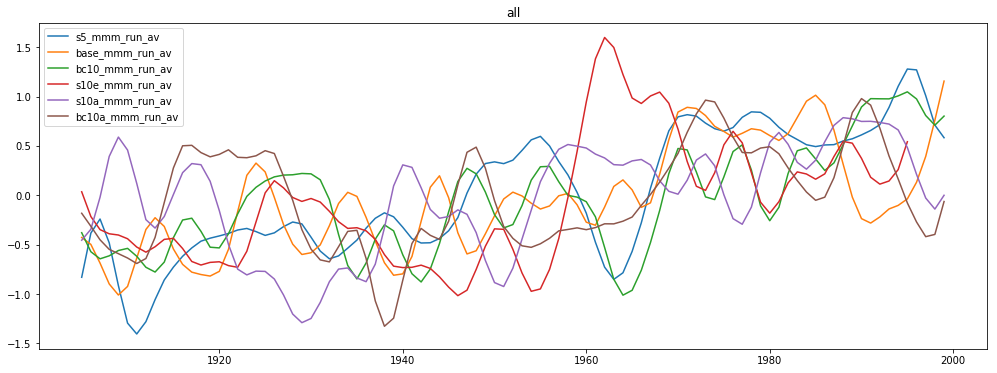

In [50]:
arrayz_npi=[None]*dic_len  
arrayz_run=[None]*dic_len 
k = 0    
    
while k < dic_len:    
    test = dictList[k]
    t = test[1]
    tr = np.array(t)
    npi_col = tr[:,0]
    runav_col = tr[:,1]

    arrayz_npi[k] = npi_col
    arrayz_run[k] = runav_col
    k = k + 1

concat_npi_run_a = np.vstack((arrayz_npi[0],arrayz_run[0]))
concat_npi_run_b = np.vstack((arrayz_npi[1],arrayz_run[1]))
concat_npi_run_c = np.vstack((arrayz_npi[2],arrayz_run[2]))
concat_npi_run_d = np.vstack((arrayz_npi[3],arrayz_run[3]))
concat_npi_run_e = np.vstack((arrayz_npi[4],arrayz_run[4]))
concat_npi_run_f = np.vstack((arrayz_npi[5],arrayz_run[5]))

df_npi_run_a = pd.DataFrame(concat_npi_run_a, index=None).T
df_npi_run_b = pd.DataFrame(concat_npi_run_b, index=None).T
df_npi_run_c = pd.DataFrame(concat_npi_run_c, index=None).T
df_npi_run_d = pd.DataFrame(concat_npi_run_d, index=None).T
df_npi_run_e = pd.DataFrame(concat_npi_run_e, index=None).T
df_npi_run_f = pd.DataFrame(concat_npi_run_f, index=None).T

df_concat_npi_run = pd.concat([df_npi_run_a,df_npi_run_b,df_npi_run_c,df_npi_run_d,df_npi_run_e,df_npi_run_f], axis=1, sort=False)

df_concat_npi_run.columns = sname_list
df_concat_npi_run.index = yearz

df_concat_npi_run
df_concat_npi_run[['s5_mmm_run_av','base_mmm_run_av','bc10_mmm_run_av','s10e_mmm_run_av','s10a_mmm_run_av','bc10a_mmm_run_av']].plot(figsize=(17,6), title='all')

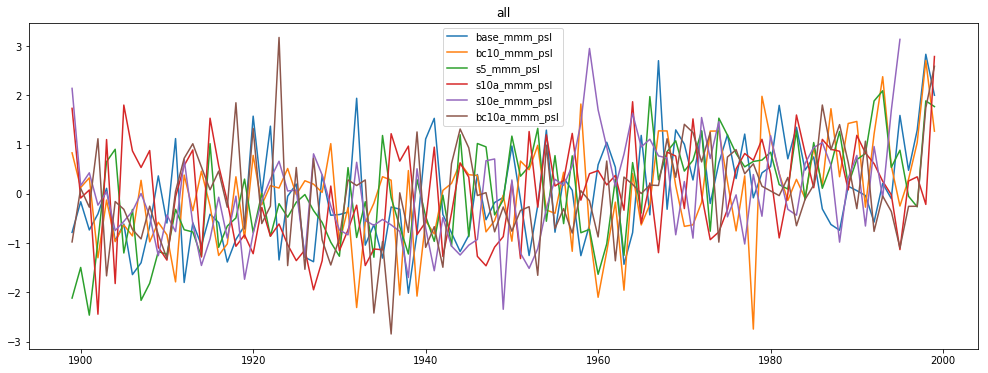

In [51]:
df_concat_npi_run[['base_mmm_psl','bc10_mmm_psl','s5_mmm_psl','s10a_mmm_psl','s10e_mmm_psl','bc10a_mmm_psl']].plot(figsize=(17,6), title='all')

Base

In [52]:
#Translating the dictionary into list form, to transfer easily into pandas DataFrame

temp_base = []
dictList_base = []

for key, value in runav_wint_Ave_npi_base.iteritems():
    temp = [key,value]
    dictList_base.append(temp)
    
dic_len_base = len(dictList_base)
dic2_len_base = dic_len_base*2

#extracting the names of the models to place into pandas dataframe

name_list_base = []
sname_list_base = []

p = 0

while p < dic_len_base:
    y = dictList_base[p]
    u = y[1]
    i = u.columns.tolist()
    name_list_base.append(i)
    p = p + 1
    
name_array_base = np.asarray(name_list_base)   
#reshape to 20, given there are 10 models that ran a base(control) run experiment - so 19 x 2 (model output and running average)
name_array_base_reshape = np.reshape(name_array_base,20, order = 'C')
namez_base = name_array_base_reshape.tolist()

q = 0

while q < dic2_len_base:
        test = namez_base[q].replace('runav_winter_av_test_ts_1d_AL_t100_slp_base_','')
        sname_list_base.append(test)
        q = q + 1

#extracting the years to place into pandas dataframe
m = dictList_base[0]
t = m[1]
yz = t.index
y = np.asarray(yz)
yearz_base = y.tolist()

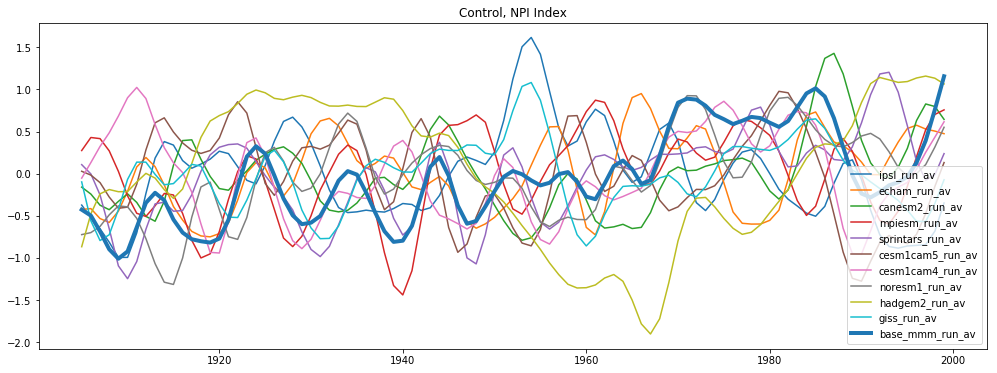

In [53]:
arrayz_npi_base=[None]*dic_len_base  
arrayz_run_base=[None]*dic_len_base
k = 0    
    
while k < dic_len_base:    
    test = dictList_base[k]
    t = test[1]
    tr = np.array(t)
    npi_col_base = tr[:,0]
    runav_col_base = tr[:,1]

    arrayz_npi_base[k] = npi_col_base
    arrayz_run_base[k] = runav_col_base
    k = k + 1

#number of concat runs below the same as the number of models involved in each experiment.    
concat_npi_base_a = np.vstack((arrayz_npi_base[0],arrayz_run_base[0]))
concat_npi_base_b = np.vstack((arrayz_npi_base[1],arrayz_run_base[1]))
concat_npi_base_c = np.vstack((arrayz_npi_base[2],arrayz_run_base[2]))
concat_npi_base_d = np.vstack((arrayz_npi_base[3],arrayz_run_base[3]))
concat_npi_base_e = np.vstack((arrayz_npi_base[4],arrayz_run_base[4]))
concat_npi_base_f = np.vstack((arrayz_npi_base[5],arrayz_run_base[5]))
concat_npi_base_g = np.vstack((arrayz_npi_base[6],arrayz_run_base[6]))
concat_npi_base_h = np.vstack((arrayz_npi_base[7],arrayz_run_base[7]))
concat_npi_base_i = np.vstack((arrayz_npi_base[8],arrayz_run_base[8]))
concat_npi_base_j = np.vstack((arrayz_npi_base[9],arrayz_run_base[9]))

df_npi_base_a = pd.DataFrame(concat_npi_base_a, index=None).T
df_npi_base_b = pd.DataFrame(concat_npi_base_b, index=None).T
df_npi_base_c = pd.DataFrame(concat_npi_base_c, index=None).T
df_npi_base_d = pd.DataFrame(concat_npi_base_d, index=None).T
df_npi_base_e = pd.DataFrame(concat_npi_base_e, index=None).T
df_npi_base_f = pd.DataFrame(concat_npi_base_f, index=None).T
df_npi_base_g = pd.DataFrame(concat_npi_base_g, index=None).T
df_npi_base_h = pd.DataFrame(concat_npi_base_h, index=None).T
df_npi_base_i = pd.DataFrame(concat_npi_base_i, index=None).T
df_npi_base_j = pd.DataFrame(concat_npi_base_j, index=None).T

df_concat_npi_base = pd.concat([df_npi_base_a,df_npi_base_b,df_npi_base_c,df_npi_base_d,df_npi_base_e,df_npi_base_f,df_npi_base_g,df_npi_base_h,df_npi_base_i,df_npi_base_j], axis=1, sort=False)

df_concat_npi_base.columns = sname_list_base
df_concat_npi_base.index = yearz_base

df_concat_npi_base[['ipsl_run_av','echam_run_av','canesm2_run_av','mpiesm_run_av','sprintars_run_av','cesm1cam5_run_av','cesm1cam4_run_av','noresm1_run_av','hadgem2_run_av','giss_run_av']].plot(figsize=(17,6), title='all')
df_concat_npi_run['base_mmm_run_av'].plot(figsize=(17,6), title='Control, NPI Index', linewidth=4, legend = True)

Bc10

In [54]:
#Translating the dictionary into list form, to transfer easily into pandas DataFrame

temp_bc10 = []
dictList_bc10 = []

for key, value in runav_wint_Ave_npi_bc10.iteritems():
    temp = [key,value]
    dictList_bc10.append(temp)
    
dic_len_bc10 = len(dictList_bc10)
dic2_len_bc10 = dic_len_bc10*2

#extracting the names of the models to place into pandas dataframe

name_list_bc10 = []
sname_list_bc10 = []

p = 0

while p < dic_len_bc10:
    y = dictList_bc10[p]
    u = y[1]
    i = u.columns.tolist()
    name_list_bc10.append(i)
    p = p + 1
    
name_array_bc10 = np.asarray(name_list_bc10)   
#reshape to 20, given there are 9 models that ran a bc10 run experiment - so 19 x 2 (model output and running average)
name_array_bc10_reshape = np.reshape(name_array_bc10,18, order = 'C')
namez_bc10 = name_array_bc10_reshape.tolist()

q = 0

while q < dic2_len_bc10:
        test = namez_bc10[q].replace('runav_winter_av_test_ts_1d_AL_t100_slp_bc10_','')
        sname_list_bc10.append(test)
        q = q + 1

#extracting the years to place into pandas dataframe
m = dictList_bc10[0]
t = m[1]
yz = t.index
y = np.asarray(yz)
yearz_bc10 = y.tolist()


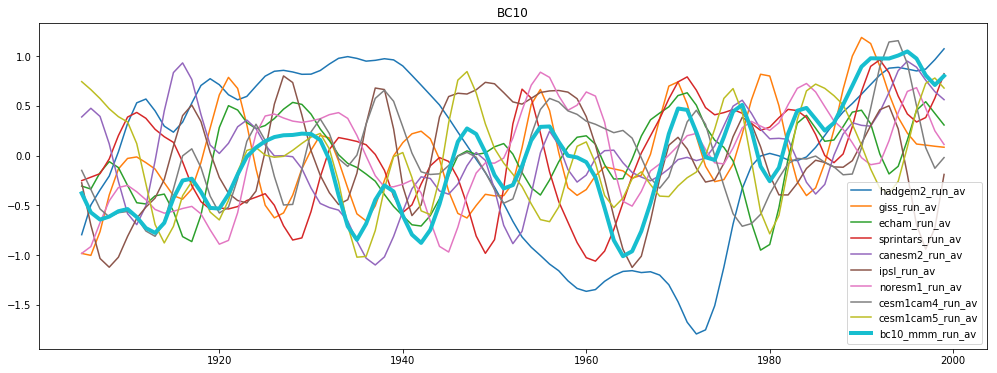

In [55]:
arrayz_npi_bc10=[None]*dic_len_bc10  
arrayz_run_bc10=[None]*dic_len_bc10
k = 0    
    
while k < dic_len_bc10:    
    test = dictList_bc10[k]
    t = test[1]
    tr = np.array(t)
    npi_col_bc10 = tr[:,0]
    runav_col_bc10 = tr[:,1]

    arrayz_npi_bc10[k] = npi_col_bc10
    arrayz_run_bc10[k] = runav_col_bc10
    k = k + 1

#number of concat runs below the same as the number of models involved in each experiment.    
concat_npi_bc10_a = np.vstack((arrayz_npi_bc10[0],arrayz_run_bc10[0]))
concat_npi_bc10_b = np.vstack((arrayz_npi_bc10[1],arrayz_run_bc10[1]))
concat_npi_bc10_c = np.vstack((arrayz_npi_bc10[2],arrayz_run_bc10[2]))
concat_npi_bc10_d = np.vstack((arrayz_npi_bc10[3],arrayz_run_bc10[3]))
concat_npi_bc10_e = np.vstack((arrayz_npi_bc10[4],arrayz_run_bc10[4]))
concat_npi_bc10_f = np.vstack((arrayz_npi_bc10[5],arrayz_run_bc10[5]))
concat_npi_bc10_g = np.vstack((arrayz_npi_bc10[6],arrayz_run_bc10[6]))
concat_npi_bc10_h = np.vstack((arrayz_npi_bc10[7],arrayz_run_bc10[7]))
concat_npi_bc10_i = np.vstack((arrayz_npi_bc10[8],arrayz_run_bc10[8]))

df_npi_bc10_a = pd.DataFrame(concat_npi_bc10_a, index=None).T
df_npi_bc10_b = pd.DataFrame(concat_npi_bc10_b, index=None).T
df_npi_bc10_c = pd.DataFrame(concat_npi_bc10_c, index=None).T
df_npi_bc10_d = pd.DataFrame(concat_npi_bc10_d, index=None).T
df_npi_bc10_e = pd.DataFrame(concat_npi_bc10_e, index=None).T
df_npi_bc10_f = pd.DataFrame(concat_npi_bc10_f, index=None).T
df_npi_bc10_g = pd.DataFrame(concat_npi_bc10_g, index=None).T
df_npi_bc10_h = pd.DataFrame(concat_npi_bc10_h, index=None).T
df_npi_bc10_i = pd.DataFrame(concat_npi_bc10_i, index=None).T

df_concat_npi_bc10 = pd.concat([df_npi_bc10_a,df_npi_bc10_b,df_npi_bc10_c,df_npi_bc10_d,df_npi_bc10_e,df_npi_bc10_f,df_npi_bc10_g,df_npi_bc10_h,df_npi_bc10_i], axis=1, sort=False)

df_concat_npi_bc10.columns = sname_list_bc10
df_concat_npi_bc10.index = yearz_bc10

df_concat_npi_bc10[['hadgem2_run_av','giss_run_av','echam_run_av','sprintars_run_av','canesm2_run_av','ipsl_run_av','noresm1_run_av','cesm1cam4_run_av','cesm1cam5_run_av']].plot(figsize=(17,6), title='all')
df_concat_npi_run['bc10_mmm_run_av'].plot(figsize=(17,6), title='BC10', linewidth = 4, legend = True)


Sul5

In [56]:
#Translating the dictionary into list form, to transfer easily into pandas DataFrame

temp_s5 = []
dictList_s5 = []

for key, value in runav_wint_Ave_npi_s5.iteritems():
    temp = [key,value]
    dictList_s5.append(temp)
    
dic_len_s5 = len(dictList_s5)
dic2_len_s5 = dic_len_s5*2

#extracting the names of the models to place into pandas dataframe

name_list_s5 = []
sname_list_s5 = []

p = 0

while p < dic_len_s5:
    y = dictList_s5[p]
    u = y[1]
    i = u.columns.tolist()
    name_list_s5.append(i)
    p = p + 1
    
name_array_s5 = np.asarray(name_list_s5)   
#reshape to 20, given there are 9 models that ran a s5(control) run experiment - so 19 x 2 (model output and running average)
name_array_s5_reshape = np.reshape(name_array_s5,16, order = 'C')
namez_s5 = name_array_s5_reshape.tolist()

q = 0

while q < dic2_len_s5:
        test = namez_s5[q].replace('runav_winter_av_test_ts_1d_AL_t100_slp_s5_','')
        sname_list_s5.append(test)
        q = q + 1

#extracting the years to place into pandas dataframe
m = dictList_s5[0]
t = m[1]
yz = t.index
y = np.asarray(yz)
yearz_s5 = y.tolist()

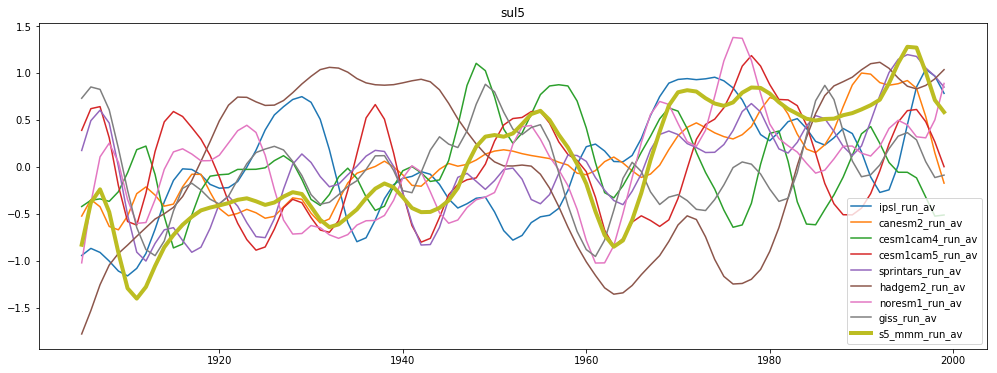

In [57]:
arrayz_npi_s5=[None]*dic_len_s5  
arrayz_run_s5=[None]*dic_len_s5
k = 0    
    
while k < dic_len_s5:    
    test = dictList_s5[k]
    t = test[1]
    tr = np.array(t)
    npi_col_s5 = tr[:,0]
    runav_col_s5 = tr[:,1]

    arrayz_npi_s5[k] = npi_col_s5
    arrayz_run_s5[k] = runav_col_s5
    k = k + 1

#number of concat runs below the same as the number of models involved in each experiment.    
concat_npi_s5_a = np.vstack((arrayz_npi_s5[0],arrayz_run_s5[0]))
concat_npi_s5_b = np.vstack((arrayz_npi_s5[1],arrayz_run_s5[1]))
concat_npi_s5_c = np.vstack((arrayz_npi_s5[2],arrayz_run_s5[2]))
concat_npi_s5_d = np.vstack((arrayz_npi_s5[3],arrayz_run_s5[3]))
concat_npi_s5_e = np.vstack((arrayz_npi_s5[4],arrayz_run_s5[4]))
concat_npi_s5_f = np.vstack((arrayz_npi_s5[5],arrayz_run_s5[5]))
concat_npi_s5_g = np.vstack((arrayz_npi_s5[6],arrayz_run_s5[6]))
concat_npi_s5_h = np.vstack((arrayz_npi_s5[7],arrayz_run_s5[7]))

df_npi_s5_a = pd.DataFrame(concat_npi_s5_a, index=None).T
df_npi_s5_b = pd.DataFrame(concat_npi_s5_b, index=None).T
df_npi_s5_c = pd.DataFrame(concat_npi_s5_c, index=None).T
df_npi_s5_d = pd.DataFrame(concat_npi_s5_d, index=None).T
df_npi_s5_e = pd.DataFrame(concat_npi_s5_e, index=None).T
df_npi_s5_f = pd.DataFrame(concat_npi_s5_f, index=None).T
df_npi_s5_g = pd.DataFrame(concat_npi_s5_g, index=None).T
df_npi_s5_h = pd.DataFrame(concat_npi_s5_h, index=None).T

df_concat_npi_s5 = pd.concat([df_npi_s5_a,df_npi_s5_b,df_npi_s5_c,df_npi_s5_d,df_npi_s5_e,df_npi_s5_f,df_npi_s5_g,df_npi_s5_h], axis=1, sort=False)

df_concat_npi_s5.columns = sname_list_s5
df_concat_npi_s5.index = yearz_s5

df_concat_npi_s5[['ipsl_run_av','canesm2_run_av','cesm1cam4_run_av','cesm1cam5_run_av','sprintars_run_av','hadgem2_run_av','noresm1_run_av','giss_run_av']].plot(figsize=(17,6), title='all', legend = True)
df_concat_npi_run['s5_mmm_run_av'].plot(figsize=(17,6), title='sul5', linewidth=4, legend = True)

BC10a

In [58]:
#Translating the dictionary into list form, to transfer easily into pandas DataFrame

temp_bc10a = []
dictList_bc10a = []

for key, value in runav_wint_Ave_npi_bc10a.iteritems():
    temp = [key,value]
    dictList_bc10a.append(temp)
    
dic_len_bc10a = len(dictList_bc10a)
dic2_len_bc10a = dic_len_bc10a*2

#extracting the names of the models to place into pandas dataframe

name_list_bc10a = []
sname_list_bc10a = []

p = 0

while p < dic_len_bc10a:
    y = dictList_bc10a[p]
    u = y[1]
    i = u.columns.tolist()
    name_list_bc10a.append(i)
    p = p + 1
    
name_array_bc10a = np.asarray(name_list_bc10a)   
#reshape to 20, given there are 5 models that ran a bc10a(control) run experiment - so 19 x 2 (model output and running average)
name_array_bc10a_reshape = np.reshape(name_array_bc10a,10, order = 'C')
namez_bc10a = name_array_bc10a_reshape.tolist()

q = 0

while q < dic2_len_bc10a:
        test = namez_bc10a[q].replace('runav_winter_av_test_ts_1d_AL_t100_slp_bc10a_','')
        sname_list_bc10a.append(test)
        q = q + 1

#extracting the years to place into pandas dataframe
m = dictList_bc10a[0]
t = m[1]
yz = t.index
y = np.asarray(yz)
yearz_bc10a = y.tolist()

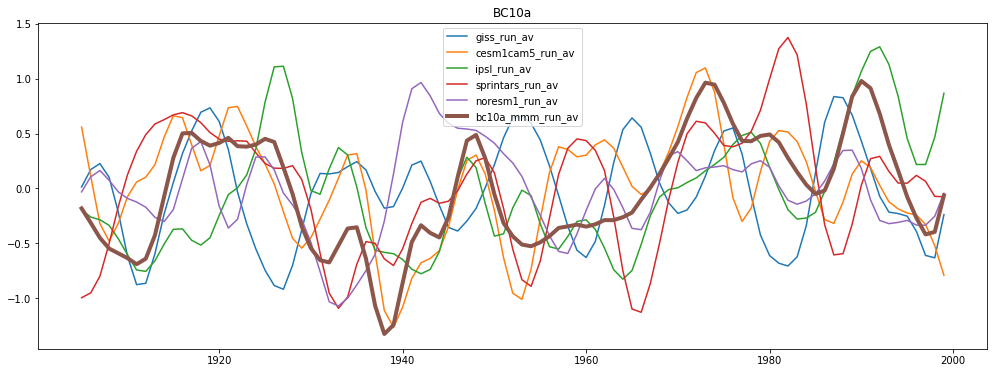

In [59]:
arrayz_npi_bc10a=[None]*dic_len_bc10a  
arrayz_run_bc10a=[None]*dic_len_bc10a
k = 0    
    
while k < dic_len_bc10a:    
    test = dictList_bc10a[k]
    t = test[1]
    tr = np.array(t)
    npi_col_bc10a = tr[:,0]
    runav_col_bc10a = tr[:,1]

    arrayz_npi_bc10a[k] = npi_col_bc10a
    arrayz_run_bc10a[k] = runav_col_bc10a
    k = k + 1

#number of concat runs below the same as the number of models involved in each experiment.    
concat_npi_bc10a_a = np.vstack((arrayz_npi_bc10a[0],arrayz_run_bc10a[0]))
concat_npi_bc10a_b = np.vstack((arrayz_npi_bc10a[1],arrayz_run_bc10a[1]))
concat_npi_bc10a_c = np.vstack((arrayz_npi_bc10a[2],arrayz_run_bc10a[2]))
concat_npi_bc10a_d = np.vstack((arrayz_npi_bc10a[3],arrayz_run_bc10a[3]))
concat_npi_bc10a_e = np.vstack((arrayz_npi_bc10a[4],arrayz_run_bc10a[4]))

df_npi_bc10a_a = pd.DataFrame(concat_npi_bc10a_a, index=None).T
df_npi_bc10a_b = pd.DataFrame(concat_npi_bc10a_b, index=None).T
df_npi_bc10a_c = pd.DataFrame(concat_npi_bc10a_c, index=None).T
df_npi_bc10a_d = pd.DataFrame(concat_npi_bc10a_d, index=None).T
df_npi_bc10a_e = pd.DataFrame(concat_npi_bc10a_e, index=None).T

df_concat_npi_bc10a = pd.concat([df_npi_bc10a_a,df_npi_bc10a_b,df_npi_bc10a_c,df_npi_bc10a_d,df_npi_bc10a_e], axis=1, sort=False)

df_concat_npi_bc10a.columns = sname_list_bc10a
df_concat_npi_bc10a.index = yearz_bc10a

df_concat_npi_bc10a[['giss_run_av','cesm1cam5_run_av','ipsl_run_av','sprintars_run_av','noresm1_run_av']].plot(figsize=(17,6), title='BC10a')
df_concat_npi_run['bc10a_mmm_run_av'].plot(figsize=(17,6), title='BC10a', linewidth = 4, legend = True)

S10a

In [60]:
#Translating the dictionary into list form, to transfer easily into pandas DataFrame

temp_s10a = []
dictList_s10a = []

for key, value in runav_wint_Ave_npi_s10a.iteritems():
    temp = [key,value]
    dictList_s10a.append(temp)
    
dic_len_s10a = len(dictList_s10a)
dic2_len_s10a = dic_len_s10a*2

#extracting the names of the models to place into pandas dataframe

name_list_s10a = []
sname_list_s10a = []

p = 0

while p < dic_len_s10a:
    y = dictList_s10a[p]
    u = y[1]
    i = u.columns.tolist()
    name_list_s10a.append(i)
    p = p + 1
    
name_array_s10a = np.asarray(name_list_s10a)   
#reshape to 20, given there are 6 models that ran a s10a(control) run experiment - so 19 x 2 (model output and running average)
name_array_s10a_reshape = np.reshape(name_array_s10a,12, order = 'C')
namez_s10a = name_array_s10a_reshape.tolist()

q = 0

while q < dic2_len_s10a:
        test = namez_s10a[q].replace('runav_winter_av_test_ts_1d_AL_t100_slp_s10a_','')
        sname_list_s10a.append(test)
        q = q + 1

#extracting the years to place into pandas dataframe
m = dictList_s10a[0]
t = m[1]
yz = t.index
y = np.asarray(yz)
yearz_s10a = y.tolist()

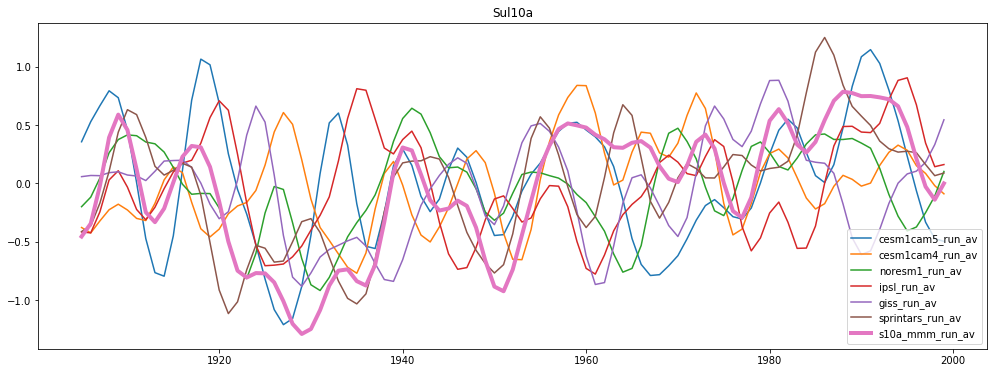

In [61]:
arrayz_npi_s10a=[None]*dic_len_s10a  
arrayz_run_s10a=[None]*dic_len_s10a
k = 0    
    
while k < dic_len_s10a:    
    test = dictList_s10a[k]
    t = test[1]
    tr = np.array(t)
    npi_col_s10a = tr[:,0]
    runav_col_s10a = tr[:,1]

    arrayz_npi_s10a[k] = npi_col_s10a
    arrayz_run_s10a[k] = runav_col_s10a
    k = k + 1

#number of concat runs below the same as the number of models involved in each experiment.    
concat_npi_s10a_a = np.vstack((arrayz_npi_s10a[0],arrayz_run_s10a[0]))
concat_npi_s10a_b = np.vstack((arrayz_npi_s10a[1],arrayz_run_s10a[1]))
concat_npi_s10a_c = np.vstack((arrayz_npi_s10a[2],arrayz_run_s10a[2]))
concat_npi_s10a_d = np.vstack((arrayz_npi_s10a[3],arrayz_run_s10a[3]))
concat_npi_s10a_e = np.vstack((arrayz_npi_s10a[4],arrayz_run_s10a[4]))
concat_npi_s10a_f = np.vstack((arrayz_npi_s10a[5],arrayz_run_s10a[5]))

df_npi_s10a_a = pd.DataFrame(concat_npi_s10a_a, index=None).T
df_npi_s10a_b = pd.DataFrame(concat_npi_s10a_b, index=None).T
df_npi_s10a_c = pd.DataFrame(concat_npi_s10a_c, index=None).T
df_npi_s10a_d = pd.DataFrame(concat_npi_s10a_d, index=None).T
df_npi_s10a_e = pd.DataFrame(concat_npi_s10a_e, index=None).T
df_npi_s10a_f = pd.DataFrame(concat_npi_s10a_f, index=None).T

df_concat_npi_s10a = pd.concat([df_npi_s10a_a,df_npi_s10a_b,df_npi_s10a_c,df_npi_s10a_d,df_npi_s10a_e,df_npi_s10a_f], axis=1, sort=False)

df_concat_npi_s10a.columns = sname_list_s10a
df_concat_npi_s10a.index = yearz_s10a

df_concat_npi_s10a[['cesm1cam5_run_av','cesm1cam4_run_av','noresm1_run_av','ipsl_run_av','giss_run_av','sprintars_run_av']].plot(figsize=(17,6), title='all')
df_concat_npi_run['s10a_mmm_run_av'].plot(figsize=(17,6), title='Sul10a', linewidth = 4, legend = True)

S10e~

In [62]:
#Translating the dictionary into list form, to transfer easily into pandas DataFrame

temp_s10e = []
dictList_s10e = []

for key, value in runav_wint_Ave_npi_s10e.iteritems():
    temp = [key,value]
    dictList_s10e.append(temp)
    
dic_len_s10e = len(dictList_s10e)
dic2_len_s10e = dic_len_s10e*2

#extracting the names of the models to place into pandas dataframe

name_list_s10e = []
sname_list_s10e = []

p = 0

while p < dic_len_s10e:
    y = dictList_s10e[p]
    u = y[1]
    i = u.columns.tolist()
    name_list_s10e.append(i)
    p = p + 1
    
name_array_s10e = np.asarray(name_list_s10e)   
#reshape to 20, given there are 6 models that ran a s10e(control) run experiment - so 19 x 2 (model output and running average)
name_array_s10e_reshape = np.reshape(name_array_s10e,12, order = 'C')
namez_s10e = name_array_s10e_reshape.tolist()

q = 0

while q < dic2_len_s10e:
        test = namez_s10e[q].replace('runav_winter_av_test_ts_1d_AL_t100_slp_s10e_','')
        sname_list_s10e.append(test)
        q = q + 1

#extracting the years to place into pandas dataframe
m = dictList_s10e[1]
t = m[1]
yz = t.index
y = np.asarray(yz)
yearz_s10e = y.tolist()

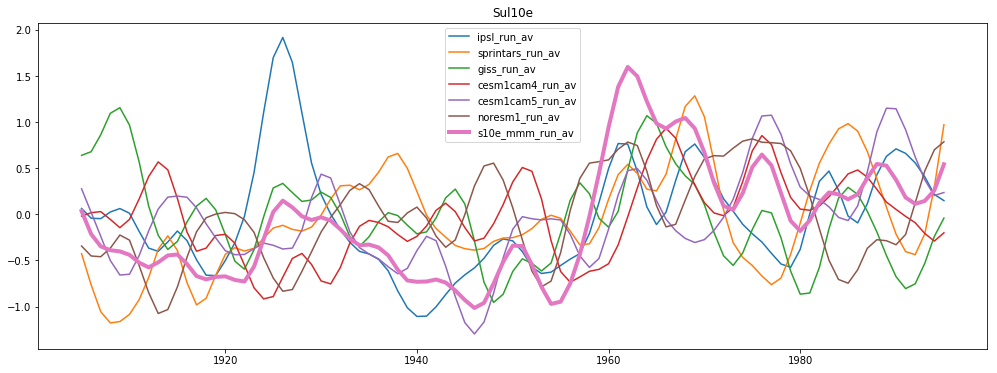

In [63]:
arrayz_npi_s10e=[None]*dic_len_s10e  
arrayz_run_s10e=[None]*dic_len_s10e
k = 0    
    
while k < dic_len_s10e:    
    test = dictList_s10e[k]
    t = test[1]
    tr = np.array(t)
    npi_col_s10e = tr[:,0]
    runav_col_s10e = tr[:,1]

    arrayz_npi_s10e[k] = npi_col_s10e
    arrayz_run_s10e[k] = runav_col_s10e
    k = k + 1

#number of concat runs below the same as the number of models involved in each experiment.    
concat_npi_s10e_a = np.vstack((arrayz_npi_s10e[0],arrayz_run_s10e[0]))
concat_npi_s10e_b = np.vstack((arrayz_npi_s10e[1],arrayz_run_s10e[1]))
concat_npi_s10e_c = np.vstack((arrayz_npi_s10e[2],arrayz_run_s10e[2]))
concat_npi_s10e_d = np.vstack((arrayz_npi_s10e[3],arrayz_run_s10e[3]))
concat_npi_s10e_e = np.vstack((arrayz_npi_s10e[4],arrayz_run_s10e[4]))
concat_npi_s10e_f = np.vstack((arrayz_npi_s10e[5],arrayz_run_s10e[5]))

df_npi_s10e_a = pd.DataFrame(concat_npi_s10e_a, index=None).T
df_npi_s10e_b = pd.DataFrame(concat_npi_s10e_b, index=None).T
df_npi_s10e_c = pd.DataFrame(concat_npi_s10e_c, index=None).T
df_npi_s10e_d = pd.DataFrame(concat_npi_s10e_d, index=None).T
df_npi_s10e_e = pd.DataFrame(concat_npi_s10e_e, index=None).T
df_npi_s10e_f = pd.DataFrame(concat_npi_s10e_f, index=None).T

df_concat_npi_s10e = pd.concat([df_npi_s10e_a,df_npi_s10e_b,df_npi_s10e_c,df_npi_s10e_d,df_npi_s10e_e,df_npi_s10e_f], axis=1, sort=False)

df_concat_npi_s10e.columns = sname_list_s10e
df_concat_npi_s10e.index = yearz_s10e

df_concat_npi_s10e[['ipsl_run_av','sprintars_run_av','giss_run_av','cesm1cam4_run_av','cesm1cam5_run_av','noresm1_run_av']].plot(figsize=(17,6), title='all')
df_concat_npi_run['s10e_mmm_run_av'].plot(figsize=(17,6), title='Sul10e', linewidth = 4, legend = True)

Sr

In [64]:
#Translating the dictionary into list form, to transfer easily into pandas DataFrame

temp_sr = []
dictList_sr = []

for key, value in runav_wint_Ave_npi_sr.iteritems():
    temp = [key,value]
    dictList_sr.append(temp)
    
dic_len_sr = len(dictList_sr)
dic2_len_sr = dic_len_sr*2

#extracting the names of the models to place into pandas dataframe

name_list_sr = []
sname_list_sr = []

p = 0

while p < dic_len_sr:
    y = dictList_sr[p]
    u = y[1]
    i = u.columns.tolist()
    name_list_sr.append(i)
    p = p + 1
    
name_array_sr = np.asarray(name_list_sr)   
#reshape to 20, given there is 1 models that ran a sr(control) run experiment - so 19 x 2 (model output and running average)
name_array_sr_reshape = np.reshape(name_array_sr,2, order = 'C')
namez_sr = name_array_sr_reshape.tolist()

q = 0

while q < dic2_len_sr:
        test = namez_sr[q].replace('runav_winter_av_test_ts_1d_AL_t100_slp_sr_','')
        sname_list_sr.append(test)
        q = q + 1

#extracting the years to place into pandas dataframe
m = dictList_sr[0]
t = m[1]
yz = t.index
y = np.asarray(yz)
yearz_sr = y.tolist()

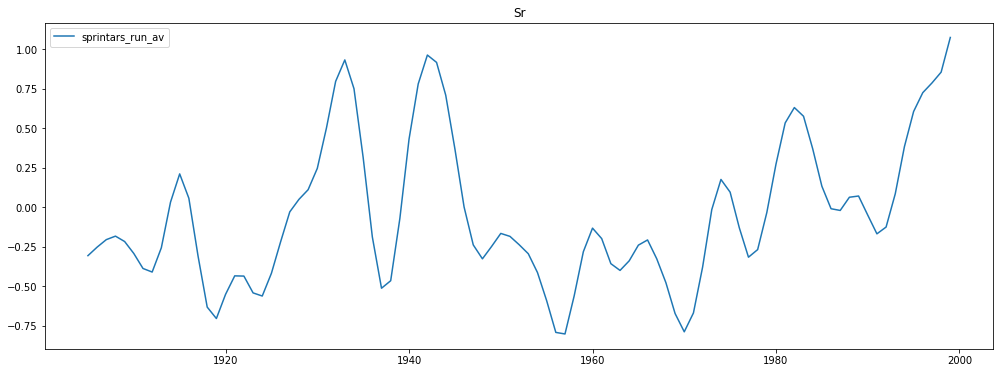

In [65]:
arrayz_npi_sr=[None]*dic_len_sr  
arrayz_run_sr=[None]*dic_len_sr
k = 0    
    
while k < dic_len_sr:    
    test = dictList_sr[k]
    t = test[1]
    tr = np.array(t)
    npi_col_sr = tr[:,0]
    runav_col_sr = tr[:,1]

    arrayz_npi_sr[k] = npi_col_sr
    arrayz_run_sr[k] = runav_col_sr
    k = k + 1

#number of concat runs below the same as the number of models involved in each experiment.    
concat_npi_sr_a = np.vstack((arrayz_npi_sr[0],arrayz_run_sr[0]))

df_npi_sr_a = pd.DataFrame(concat_npi_sr_a, index=None).T

df_concat_npi_sr = pd.concat([df_npi_sr_a], axis=1, sort=False)

df_concat_npi_sr.columns = sname_list_sr
df_concat_npi_sr.index = yearz_sr

df_concat_npi_sr[['sprintars_run_av']].plot(figsize=(17,6), title='Sr', legend = True)

Sar

In [66]:
#Translating the dictionary into list form, to transfer easily into pandas DataFrame

temp_sar = []
dictList_sar = []

for key, value in runav_wint_Ave_npi_sar.iteritems():
    temp = [key,value]
    dictList_sar.append(temp)
    
dic_len_sar = len(dictList_sar)
dic2_len_sar = dic_len_sar*2

#extracting the names of the models to place into pandas dataframe

name_list_sar = []
sname_list_sar = []

p = 0

while p < dic_len_sar:
    y = dictList_sar[p]
    u = y[1]
    i = u.columns.tolist()
    name_list_sar.append(i)
    p = p + 1
    
name_array_sar = np.asarray(name_list_sar)   
#reshape to 20, given there is 1 models that ran a sar(control) run experiment - so 19 x 2 (model output and running average)
name_array_sar_reshape = np.reshape(name_array_sar,2, order = 'C')
namez_sar = name_array_sar_reshape.tolist()

q = 0

while q < dic2_len_sar:
        test = namez_sar[q].replace('runav_winter_av_test_ts_1d_AL_t100_slp_sar_','')
        sname_list_sar.append(test)
        q = q + 1

#extracting the years to place into pandas dataframe
m = dictList_sar[0]
t = m[1]
yz = t.index
y = np.asarray(yz)
yearz_sar = y.tolist()

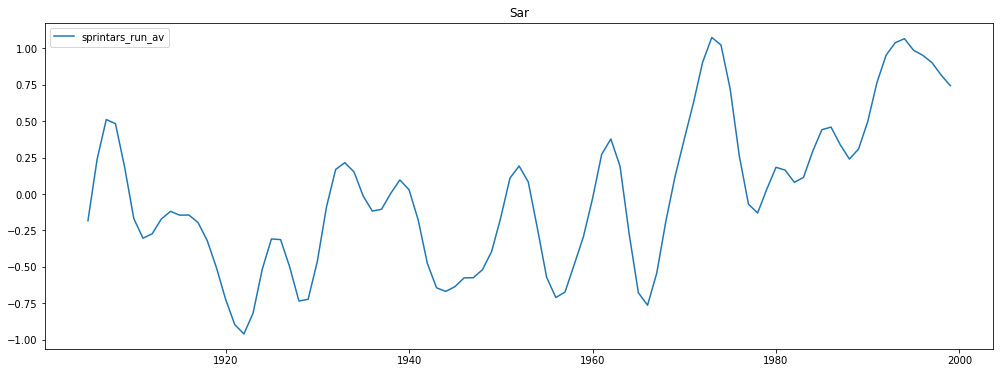

In [67]:
arrayz_npi_sar=[None]*dic_len_sar  
arrayz_run_sar=[None]*dic_len_sar
k = 0    
    
while k < dic_len_sar:    
    test = dictList_sar[k]
    t = test[1]
    tr = np.array(t)
    npi_col_sar = tr[:,0]
    runav_col_sar = tr[:,1]

    arrayz_npi_sar[k] = npi_col_sar
    arrayz_run_sar[k] = runav_col_sar
    k = k + 1

#number of concat runs below the same as the number of models involved in each experiment.    
concat_npi_sar_a = np.vstack((arrayz_npi_sar[0],arrayz_run_sar[0]))

df_npi_sar_a = pd.DataFrame(concat_npi_sar_a, index=None).T

df_concat_npi_sar = pd.concat([df_npi_sar_a], axis=1, sort=False)

df_concat_npi_sar.columns = sname_list_sar
df_concat_npi_sar.index = yearz_sar

df_concat_npi_sar[['sprintars_run_av']].plot(figsize=(17,6), title='Sar', legend = True)

Plotting all model outputs on one graph

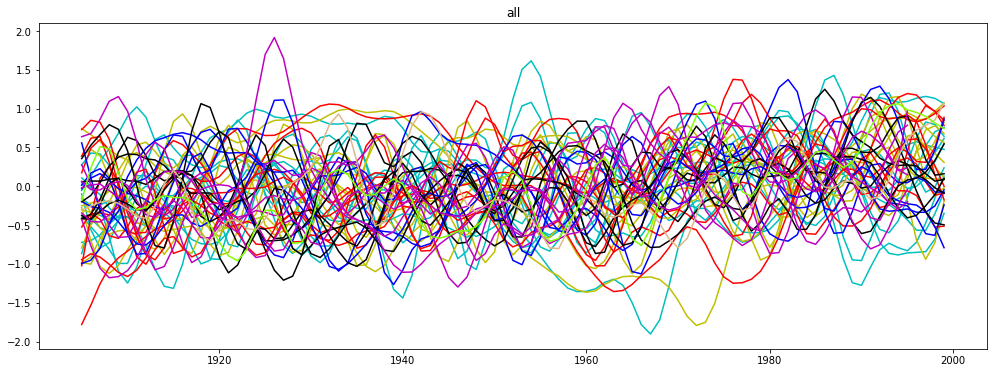

In [68]:
#setting the reference axis as that of the dataframe from the base/control runs
ax = df_concat_npi_base[['ipsl_run_av','echam_run_av','canesm2_run_av','mpiesm_run_av','sprintars_run_av','cesm1cam5_run_av','cesm1cam4_run_av','noresm1_run_av','hadgem2_run_av','giss_run_av']].plot(figsize=(17,6), title='all',color=['c'], legend=False)

df_concat_npi_bc10[['hadgem2_run_av','giss_run_av','echam_run_av','sprintars_run_av','canesm2_run_av','ipsl_run_av','noresm1_run_av','cesm1cam4_run_av','cesm1cam5_run_av']].plot(ax=ax, color=['y'], legend=False)
df_concat_npi_s5[['ipsl_run_av','canesm2_run_av','cesm1cam4_run_av','cesm1cam5_run_av','sprintars_run_av','hadgem2_run_av','noresm1_run_av','giss_run_av']].plot(ax=ax, color=['r'], legend=False)
df_concat_npi_bc10a[['giss_run_av','cesm1cam5_run_av','ipsl_run_av','sprintars_run_av','noresm1_run_av']].plot(ax=ax, color=['b'], legend=False)
df_concat_npi_s10a[['cesm1cam5_run_av','cesm1cam4_run_av','noresm1_run_av','ipsl_run_av','giss_run_av','sprintars_run_av']].plot(ax=ax, color=['k'], legend=False)
df_concat_npi_s10e[['ipsl_run_av','sprintars_run_av','giss_run_av','cesm1cam4_run_av','cesm1cam5_run_av','noresm1_run_av']].plot(ax=ax, color=['m'], legend=False)
df_concat_npi_sr[['sprintars_run_av']].plot(ax=ax, color=['burlywood'], legend=False)
df_concat_npi_sar[['sprintars_run_av']].plot(ax=ax, color=['chartreuse'], legend=False)

#df_concat_npi_s10e[['ipsl_run_av','sprintars_run_av','giss_run_av','cesm1cam4_run_av','cesm1cam5_run_av','noresm1_run_av']].plot(figsize=(17,6), title='all')
#df_concat_npi_run['s10e_mmm_run_av'].plot(figsize=(17,6), title='all')

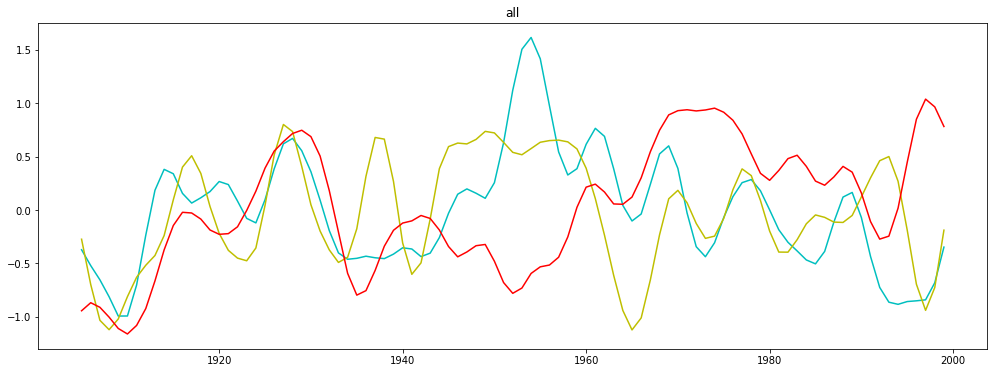

In [69]:
#setting the reference axis as that of the dataframe from the base/control runs
ax = df_concat_npi_base[['ipsl_run_av']].plot(figsize=(17,6), title='all',color=['c'], legend=False)

df_concat_npi_bc10[['ipsl_run_av']].plot(ax=ax, color=['y'], legend=False)
df_concat_npi_s5[['ipsl_run_av']].plot(ax=ax, color=['r'], legend=False)


#df_concat_npi_s10e[['ipsl_run_av','sprintars_run_av','giss_run_av','cesm1cam4_run_av','cesm1cam5_run_av','noresm1_run_av']].plot(figsize=(17,6), title='all')
#df_concat_npi_run['s10e_mmm_run_av'].plot(figsize=(17,6), title='all')

Calculating 15 year trends

Text(0.5,1,'15-year running trends')

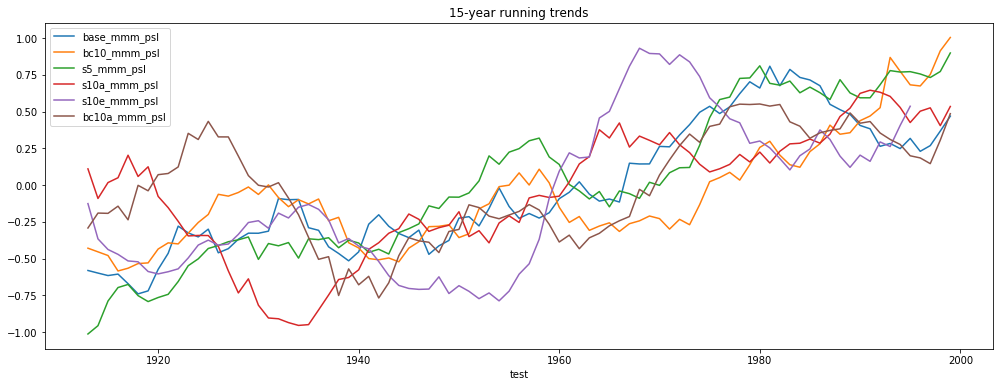

In [70]:
def yeartrend(values,window):
    weights = np.repeat(1.0,window)/window
    smas = np.convolve(values,weights,'valid')
    return smas

year_trend15_base = pd.DataFrame((yeartrend(df_concat_npi_run['base_mmm_psl'],15)))
year_trend15_bc10 = pd.DataFrame((yeartrend(df_concat_npi_run['bc10_mmm_psl'],15)))
year_trend15_s5 = pd.DataFrame((yeartrend(df_concat_npi_run['s5_mmm_psl'],15)))
year_trend15_s10a = pd.DataFrame((yeartrend(df_concat_npi_run['s10a_mmm_psl'],15)))
year_trend15_s10e = pd.DataFrame((yeartrend(df_concat_npi_run['s10e_mmm_psl'],15)))
year_trend15_bc10a = pd.DataFrame((yeartrend(df_concat_npi_run['bc10a_mmm_psl'],15)))

year_trend15_allmods = pd.concat([year_trend15_base,year_trend15_bc10,year_trend15_s5,year_trend15_s10a,year_trend15_s10e,year_trend15_bc10a], axis=1, sort=False)
year_trend15_allmods.index = df_concat_npi_run.index[14:]
year_trend15_allmods.columns = ['base_mmm_psl','bc10_mmm_psl','s5_mmm_psl','s10a_mmm_psl','s10e_mmm_psl','bc10a_mmm_psl']

year_trend15_allmods.plot(figsize=(17,6))
plt.xlabel('test')
plt.title('15-year running trends')

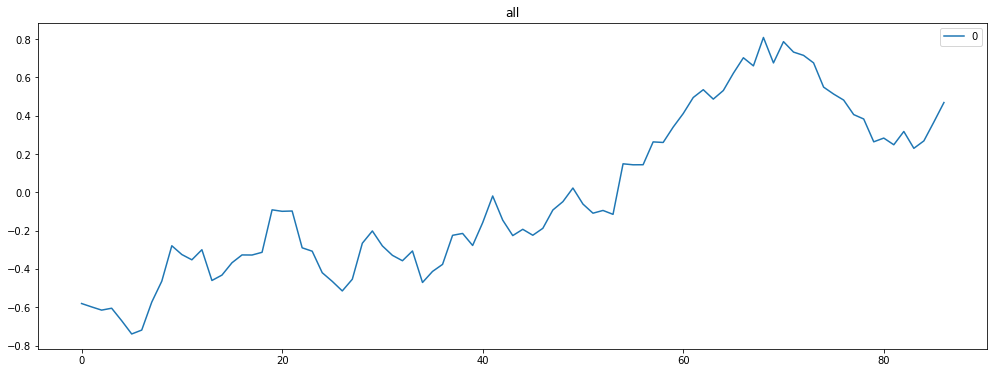

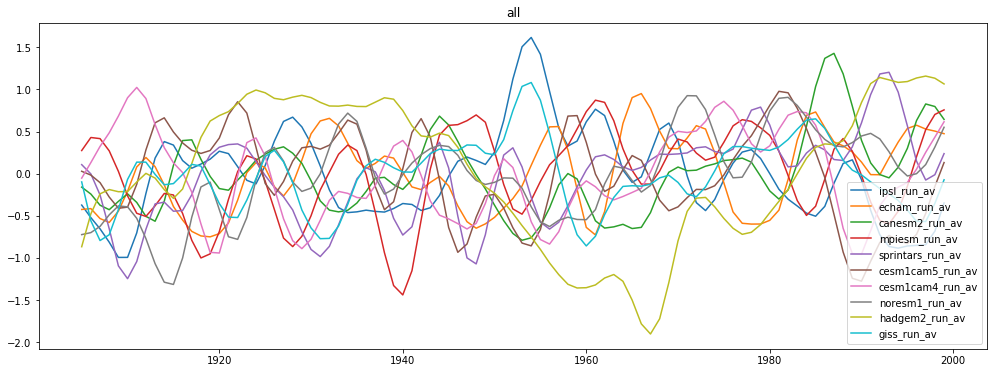

In [71]:
year_trend15_base = pd.DataFrame((yeartrend(df_concat_npi_run['base_mmm_psl'],15))).plot(figsize=(17,6), title='all')
df_concat_npi_base[['ipsl_run_av','echam_run_av','canesm2_run_av','mpiesm_run_av','sprintars_run_av','cesm1cam5_run_av','cesm1cam4_run_av','noresm1_run_av','hadgem2_run_av','giss_run_av']].plot(figsize=(17,6), title='all')

Flatten on Base control run - to show deviation from control run in perturbed runs

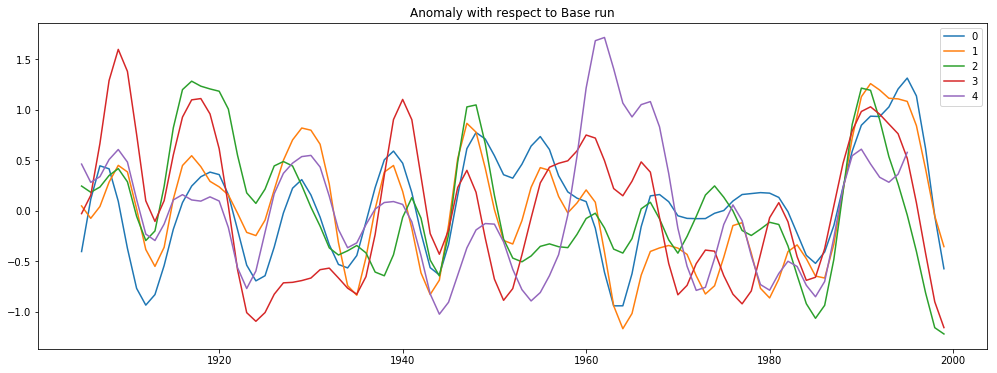

In [72]:
df_basediff_s5_npi_run = df_concat_npi_run['s5_mmm_run_av'] - df_concat_npi_run['base_mmm_run_av']
df_basediff_bc10_npi_run = df_concat_npi_run['bc10_mmm_run_av'] - df_concat_npi_run['base_mmm_run_av']
df_basediff_bc10a_npi_run = df_concat_npi_run['bc10a_mmm_run_av'] - df_concat_npi_run['base_mmm_run_av']
df_basediff_s10a_npi_run = df_concat_npi_run['s10a_mmm_run_av'] - df_concat_npi_run['base_mmm_run_av']
df_basediff_s10e_npi_run = df_concat_npi_run['s10e_mmm_run_av'] - df_concat_npi_run['base_mmm_run_av']

df_concat_basediff_npi_run = pd.concat([df_basediff_s5_npi_run,df_basediff_bc10_npi_run,df_basediff_bc10a_npi_run,df_basediff_s10a_npi_run,df_basediff_s10e_npi_run], axis=1, sort=False)
df_concat_basediff_npi_run
df_concat_basediff_npi_run.plot(figsize=(17,6), title='Anomaly with respect to Base run', legend = True)


Using pandas and dataframe to import and plot NPI observational data

In [73]:
def with_indexing(date):
    return datetime.datetime.strptime(date,"%Y%m")

npi_obs = pd.read_csv('/nfs/see-fs-02_users/eewjd/Documents/PDRMIP_docs/npindex_monthly.csv',parse_dates=['Date'],date_parser=with_indexing).set_index('Date')
npi_obs = npi_obs*100

In [74]:
ndjfm_npi_obs = npi_obs[npi_obs.index.month.isin([11,12,1,2,3])]
nd_npi_obs = ndjfm_npi_obs[ndjfm_npi_obs.index.month.isin([11,12])]
jfm_npi_obs = ndjfm_npi_obs[ndjfm_npi_obs.index.month.isin([1,2,3])]

In [75]:
index = pd.date_range('1899 1', '2018 3', freq='1MS')
data = npi_obs
df = pd.DataFrame(index=index, data=npi_obs)
wint_Ave_npi = dict()

#NDJFM North Pacific Index anomalies based on 1925-1989 mean of 1008.9 hPa
#Data also retrievable from https://climatedataguide.ucar.edu/climate-data/north-pacific-np-index-trenberth-and-hurrell-monthly-and-winter

#mean ndjfm npi Pa value
mean_value_npi = 1008.9

#calculating average of over the winter months for each calendar year, taking in the monthly data as input
for i in range(1899,2018):
    # find rows that meet your criteria and average
    idx1 = (df.index.year==i-1) & (df.index.month >10)
    idx2 = (df.index.year==i) & (df.index.month < 4)

    wint_Ave_npi[i] = df.loc[idx1 | idx2, :].mean(axis=0)

#converting back from dictionary and dividing by 100 to go from Pa to hPa
winter_av_npi = (pd.DataFrame.from_dict(wint_Ave_npi, orient = 'index'))/100

#calculating the anomaly
anom_winter_av_npi = winter_av_npi - mean_value_npi

#standard deviation of the anomaly
std_anom_winter_npi = anom_winter_av_npi.std(axis=0)

#mean of the anomaly
mean_anom_winter_npi = anom_winter_av_npi.mean(axis=0)

#standardisation of the anomaly - http://statisticsbyjim.com/glossary/standardization/
stds_anom_winter_npi = (anom_winter_av_npi - mean_anom_winter_npi)/std_anom_winter_npi

In [76]:
#calculuting the weighted (1,2,5,6,5,3,1) running average - from (Climate Data Guide; A. Phillips)
wts = np.array([1, 3, 5, 6, 5, 3, 1])
def f(w):                        
        def g(x):
            return (w*x).mean()
        return g

stds_anom_winter_npi_ra = stds_anom_winter_npi.rolling(window=7).apply(lambda x: wts.dot(x) / wts.sum())

/nfs/see-fs-02_users/eewjd/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


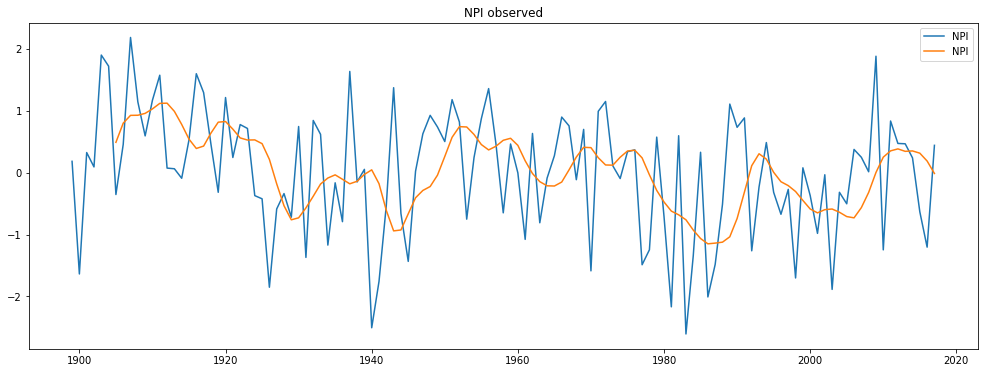

In [77]:
npi_obs_pp = pd.concat([stds_anom_winter_npi,stds_anom_winter_npi_ra], axis=1, sort=False)
npi_obs_pp.plot(figsize=(17,6), title = 'NPI observed')

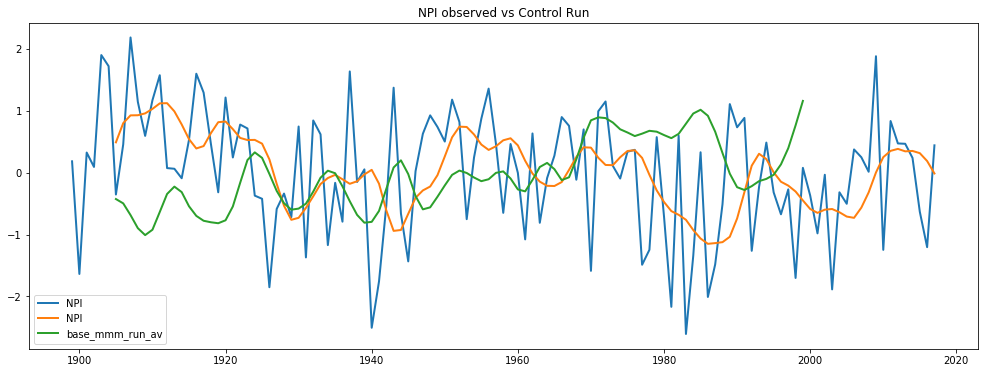

In [78]:
test = pd.concat([npi_obs_pp,df_concat_npi_run['base_mmm_run_av']], axis=1, sort=False)
test
test.plot(figsize=(17,6), title = 'NPI observed vs Control Run', linewidth = (2))

Trying to create a Power Spectrum for the observational NPI Data

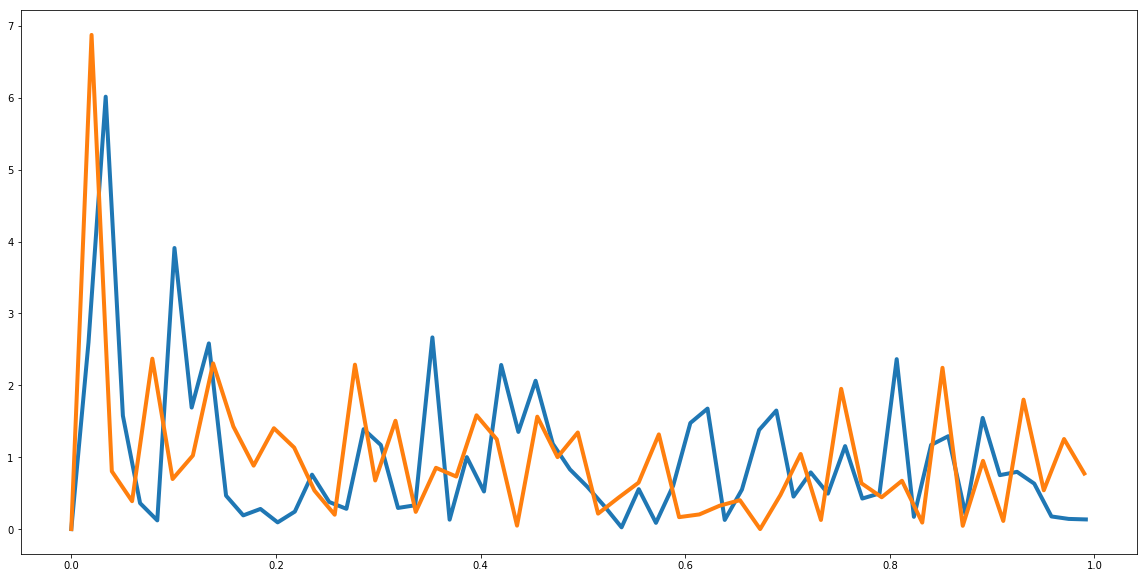

In [79]:
npi_obs_vals = npi_obs_pp.values[:,0]

base_vals = np.asarray(df_concat_npi_run['base_mmm_psl'])
s5_vals = np.asarray(df_concat_npi_run['s5_mmm_psl'])
bc10_vals = np.asarray(df_concat_npi_run['bc10_mmm_psl'])
s10a_vals = np.asarray(df_concat_npi_run['s10a_mmm_psl'])
s10e_vals = np.asarray(df_concat_npi_run['s10e_mmm_psl'])
bc10a_vals = np.asarray(df_concat_npi_run['bc10a_mmm_psl'])

#given that s10e is shorter in time that the rest, there are NaN values at the end of the array that have to be removed in order to create a power spectrum

s10e_vals = s10e_vals[np.logical_not(np.isnan(s10e_vals))]

base_val = base_vals[:]
s5_val = s5_vals[:]
bc10_val = bc10_vals[:]
s10a_val = s10a_vals[:]
s10e_val = s10e_vals[:]
bc10a_val = bc10a_vals[:]

f_obs, powspec_obs = sp.signal.periodogram(npi_obs_vals,fs=2, return_onesided=True)
f_base, powspec_base = sp.signal.periodogram(base_val,fs=2, return_onesided=True)
f_bc10, powspec_bc10 = sp.signal.periodogram(bc10_val,fs=2, return_onesided=True)
f_s10a, powspec_s10a = sp.signal.periodogram(s10a_val,fs=2, return_onesided=True)
f_s10e, powspec_s10e = sp.signal.periodogram(s10e_val,fs=2, return_onesided=True)
f_bc10a, powspec_bc10a = sp.signal.periodogram(bc10a_val,fs=2, return_onesided=True)

plt.figure(figsize=(20,10))

plt.plot(f_obs, powspec_obs, linewidth = 4)
plt.plot(f_base, powspec_base, linewidth = 4)
#plt.plot(f_bc10, powspec_bc10, linewidth = 1)
#plt.plot(f_s10a, powspec_s10a, linewidth = 1)
#plt.plot(f_s10e, powspec_s10e, linewidth = 1)
#plt.plot(f_bc10a, powspec_bc10a, linewidth = 1)

plt.show()

In [80]:
#Resampling the power spectrum to create a multi-exp mean

#adding zeros to f_s10e to make same lenght as other arrays to produce average
f_s10e_pad = np.pad(f_s10e,(0,2), 'constant')
powspec_s10e_pad = np.pad(powspec_s10e,(0,2), 'constant')

f_compiled = np.column_stack((f_base,f_bc10,f_s10a,f_s10e_pad,f_bc10a))
powspec_compiled = np.column_stack((powspec_base,powspec_bc10,powspec_s10a,powspec_s10e_pad,powspec_bc10a))

f_mean = np.mean(f_compiled, axis=1)
powspec_mean = np.mean(powspec_compiled, axis=1)


powspec_mean

array([3.45203392e-32, 6.18423901e+00, 1.26379218e+00, 2.35352426e+00,
       2.40935032e+00, 6.79586887e-01, 6.74889956e-01, 1.40988320e+00,
       1.01372700e+00, 7.78197965e-01, 7.31819963e-01, 1.09225369e+00,
       6.30608322e-01, 2.10375967e+00, 1.37010303e+00, 1.25328117e+00,
       8.92859525e-01, 6.05331956e-01, 7.35761084e-01, 1.16804031e+00,
       9.70055557e-01, 5.19684874e-01, 4.38375949e-01, 5.96288429e-01,
       9.86537339e-01, 6.43783796e-01, 6.08404235e-01, 4.48397515e-01,
       3.17893597e-01, 7.38475830e-01, 2.54847974e-01, 3.73708278e-01,
       4.10175250e-01, 7.11062363e-01, 3.84220153e-01, 6.70746742e-01,
       5.42953316e-01, 2.38386710e-01, 5.61758087e-01, 1.25286150e+00,
       1.03939616e+00, 4.22701439e-01, 6.94956129e-01, 2.30003296e+00,
       7.25109267e-01, 1.00204045e+00, 4.94026606e-01, 9.16889558e-01,
       1.10297269e+00, 1.15523402e+00, 7.27013729e-01])

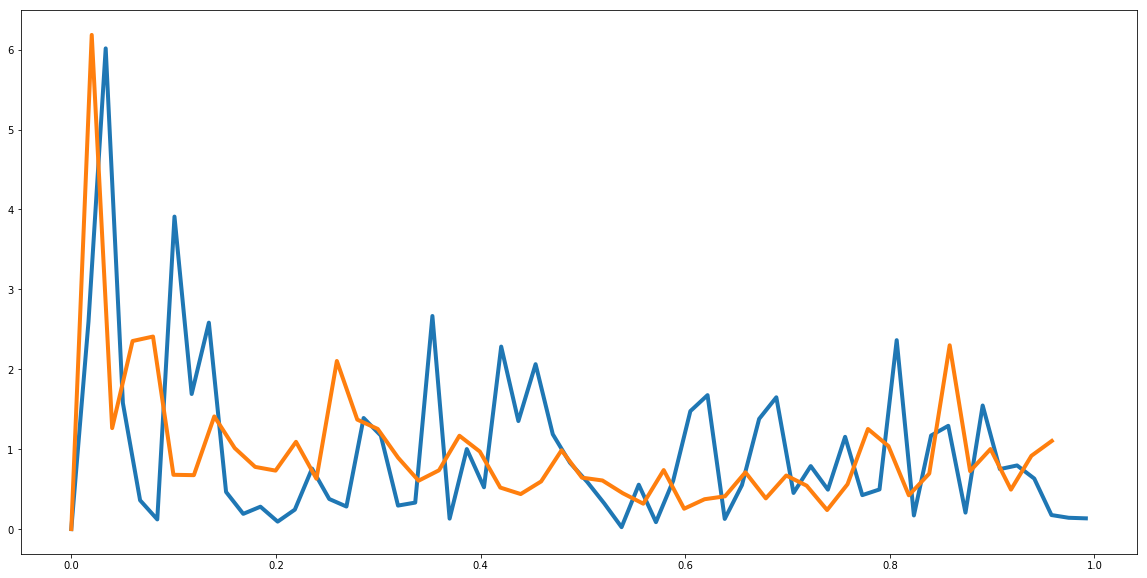

In [81]:
plt.figure(figsize=(20,10))

plt.plot(f_obs, powspec_obs, linewidth = 4)
#plt.plot(f_base, powspec_base, linewidth = 4)
plt.plot(f_mean[:49], powspec_mean[:49], linewidth = 4)


plt.show()

Dictionary containing multi-model means (time average) - Sea Level Pressure

In [82]:
slp_mmms_dict = {
    "slp_base_mmm": slp_base_mmm,
    "slp_bc10_mmm": slp_bc10_mmm,
    "slp_s5_mmm": slp_s5_mmm,
    "slp_bc10a_mmm": slp_bc10a_mmm,
    "slp_s10a_mmm": slp_s10a_mmm,
    "slp_s10e_mmm": slp_s10e_mmm,
    "slp_sr_mmm": slp_sr_mmm,
    "slp_sar_mmm": slp_sar_mmm,
}

Extracting data within the Aleutian Low Region - defined as 160-220 deg E, 30-65 deg N

for all the cf-fields, 
subspace the data to within the region defined as the Aleutian Low
and create a renamed field that only includes Aleutian Low data

In [83]:
AL_slp_mmms_dict = {}

for run in slp_mmms_dict:
    value = slp_mmms_dict[run]
    new_name = "AL_" + run
    x = value.subspace(longitude=cf.wi(160,220))
    y = x.subspace(latitude=cf.wi(30,65))
    AL_slp_mmms_dict.update({new_name:y})

Extracting from dictionary 

In [84]:
AL_slp_base_mmm = AL_slp_mmms_dict['AL_slp_base_mmm']
AL_slp_bc10_mmm = AL_slp_mmms_dict['AL_slp_bc10_mmm']
AL_slp_s5_mmm = AL_slp_mmms_dict['AL_slp_s5_mmm']
AL_slp_bc10a_mmm = AL_slp_mmms_dict['AL_slp_bc10a_mmm']
AL_slp_s10a_mmm = AL_slp_mmms_dict['AL_slp_s10a_mmm']
AL_slp_s10e_mmm = AL_slp_mmms_dict['AL_slp_s10e_mmm']
AL_slp_sr_mmm = AL_slp_mmms_dict['AL_slp_sr_mmm']
AL_slp_sar_mmm = AL_slp_mmms_dict['AL_slp_sar_mmm']

Removing time axis in preparation to do plotting (Dimension was causing an error)

In [85]:
arr_AL_slp_base_mmm = np.squeeze(AL_slp_base_mmm.array, axis = 0)
arr_AL_slp_bc10_mmm = np.squeeze(AL_slp_bc10_mmm.array, axis = 0)
arr_AL_slp_s5_mmm = np.squeeze(AL_slp_s5_mmm.array, axis = 0)
arr_AL_slp_bc10a_mmm = np.squeeze(AL_slp_bc10a_mmm.array, axis = 0)
arr_AL_slp_s10a_mmm = np.squeeze(AL_slp_s10a_mmm.array, axis = 0)
arr_AL_slp_s10e_mmm = np.squeeze(AL_slp_s10e_mmm.array, axis = 0)
arr_AL_slp_sr_mmm = np.squeeze(AL_slp_sr_mmm.array, axis = 0)
arr_AL_slp_sar_mmm = np.squeeze(AL_slp_sar_mmm.array, axis = 0)

Reshaping the array to 1-D (essentially a list of values that can then be binned and plotted as a histogram) 928 is the size of the 2-D array converted to 1D

In [86]:
rs_arr_AL_slp_base_mmm = np.reshape(arr_AL_slp_base_mmm,928)
rs_arr_AL_slp_bc10_mmm = np.reshape(arr_AL_slp_bc10_mmm,928)
rs_arr_AL_slp_s5_mmm = np.reshape(arr_AL_slp_s5_mmm,928)
rs_arr_AL_slp_bc10a_mmm = np.reshape(arr_AL_slp_bc10a_mmm,928)
rs_arr_AL_slp_s10a_mmm = np.reshape(arr_AL_slp_s10a_mmm,928)
rs_arr_AL_slp_s10e_mmm = np.reshape(arr_AL_slp_s10e_mmm,928)
rs_arr_AL_slp_sr_mmm = np.reshape(arr_AL_slp_sr_mmm,928)
rs_arr_AL_slp_sar_mmm = np.reshape(arr_AL_slp_sar_mmm,928)

Writing to file - with intention of reading back in as csv

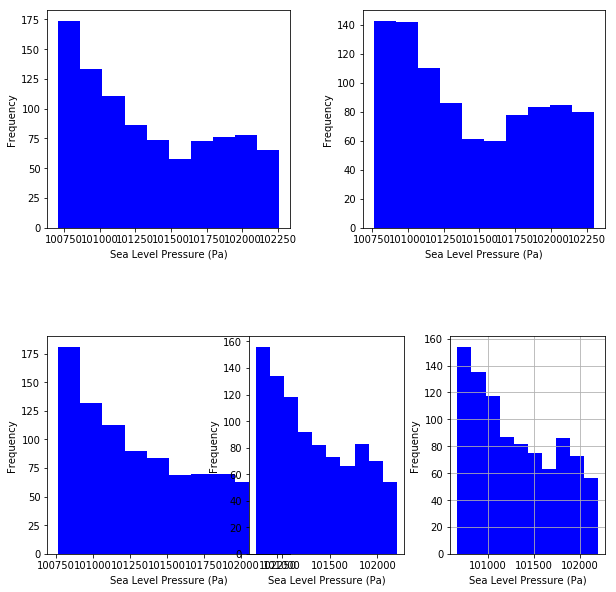

In [87]:
# Initiate new Figure
fig = plt.figure(figsize=(10,10))

# Top left plot
ax1=fig.add_subplot(2, 2, 1)
n1, bins1, patches1 = plt.hist(rs_arr_AL_slp_base_mmm, 10, density=False, facecolor='b', histtype= 'stepfilled')
plt.xlabel('Sea Level Pressure (Pa)')
plt.ylabel('Frequency')

# Top right plot
ax2=fig.add_subplot(2, 2, 2)
n2, bins2, patches2 = plt.hist(rs_arr_AL_slp_bc10_mmm, 10, density=False, facecolor='b', histtype= 'stepfilled')
plt.xlabel('Sea Level Pressure (Pa)')
plt.ylabel('Frequency')

# Bottom left plot
ax3=fig.add_subplot(2, 2, 3)
n3, bins3, patches3 = plt.hist(rs_arr_AL_slp_s5_mmm, 10, density=False, facecolor='b', histtype= 'stepfilled')
plt.xlabel('Sea Level Pressure (Pa)')
plt.ylabel('Frequency')

# Bottom mid plot
ax4=fig.add_subplot(2, 3, 5)
n4, bins4, patches4 = plt.hist(rs_arr_AL_slp_s10a_mmm, 10, density=False, facecolor='b', histtype= 'stepfilled')
plt.xlabel('Sea Level Pressure (Pa)')
plt.ylabel('Frequency')

# Bottom right plot
ax5=fig.add_subplot(2, 3, 6)
n5, bins5, patches5 = plt.hist(rs_arr_AL_slp_s10e_mmm, 10, density=False, facecolor='b', histtype= 'stepfilled')
plt.xlabel('Sea Level Pressure (Pa)')
plt.ylabel('Frequency')

# This will specify the space inbetween the subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.xlabel('Sea Level Pressure (Pa)')
plt.ylabel('Frequency')

plt.axis()
plt.grid(True)
plt.show()

In [88]:
bin_centres1 = bins1[:-1] + 0.5 * np.diff(bins1)
bin_centres2 = bins2[:-1] + 0.5 * np.diff(bins2)
bin_centres3 = bins3[:-1] + 0.5 * np.diff(bins3)
bin_centres4 = bins4[:-1] + 0.5 * np.diff(bins4)
bin_centres5 = bins5[:-1] + 0.5 * np.diff(bins5)

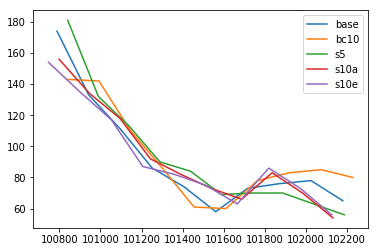

In [89]:
# Initiate new Figure
fig = plt.figure()

# Inititate a new Axes in fig called ax1
ax1 = fig.add_subplot(1,1,1)

# Plot the three lines, each with a label 
ax1.plot(bin_centres1, n1, label='base')
ax1.plot(bin_centres2, n2, label='bc10')
ax1.plot(bin_centres3, n3, label='s5')
ax1.plot(bin_centres4, n4, label='s10a')
ax1.plot(bin_centres5, n5, label='s10e')

# Add a legend containing the three labels
ax1.legend()

# Make the plot visible below
plt.show()


In [90]:
ua_asia_diff = ua_s10a_mmm - ua_base_mmm
ua_euro_diff = ua_s10e_mmm - ua_base_mmm
ua_reg_diff = ua_s10a_mmm - ua_s10e_mmm

NameError: name 'ua_s10a_mmm' is not defined

In [ ]:
cf.write(AL_slp_base_mmm,'/nfs/annie/eewjd/PDRMIP_tm_fin50_rg/reg_data/al/AL_slp_base_mmm.nc')
cf.write(AL_slp_bc10_mmm,'/nfs/annie/eewjd/PDRMIP_tm_fin50_rg/reg_data/al/AL_slp_bc10_mmm.nc')
cf.write(AL_slp_s5_mmm,'/nfs/annie/eewjd/PDRMIP_tm_fin50_rg/reg_data/al/AL_slp_s5_mmm.nc')
cf.write(AL_slp_bc10a_mmm,'/nfs/annie/eewjd/PDRMIP_tm_fin50_rg/reg_data/al/AL_slp_bc10a_mmm.nc')
cf.write(AL_slp_s10a_mmm,'/nfs/annie/eewjd/PDRMIP_tm_fin50_rg/reg_data/al/AL_slp_s10a_mmm.nc')
cf.write(AL_slp_s10e_mmm,'/nfs/annie/eewjd/PDRMIP_tm_fin50_rg/reg_data/al/AL_slp_s10e_mmm.nc')
cf.write(AL_slp_sr_mmm,'/nfs/annie/eewjd/PDRMIP_tm_fin50_rg/reg_data/al/AL_slp_sr_mmm.nc')
cf.write(AL_slp_sar_mmm,'/nfs/annie/eewjd/PDRMIP_tm_fin50_rg/reg_data/al/AL_slp_sar_mmm.nc')

In [ ]:
va_asia_diff = va_s10a_mmm - va_base_mmm
va_euro_diff = va_s10e_mmm - va_base_mmm
va_reg_diff = va_s10a_mmm - va_s10e_mmm

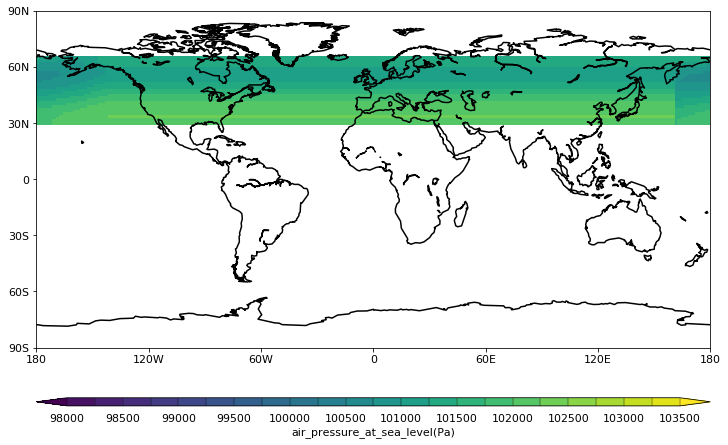

In [18]:
cfp.mapset(lonmin=-180, lonmax=180, latmin=-90, latmax=90)
cfp.levs(min=98000,max=103500,step=250)
cfp.con(AL_slp_mmms["AL_slp_base_mmm"], blockfill=True, lines=False)

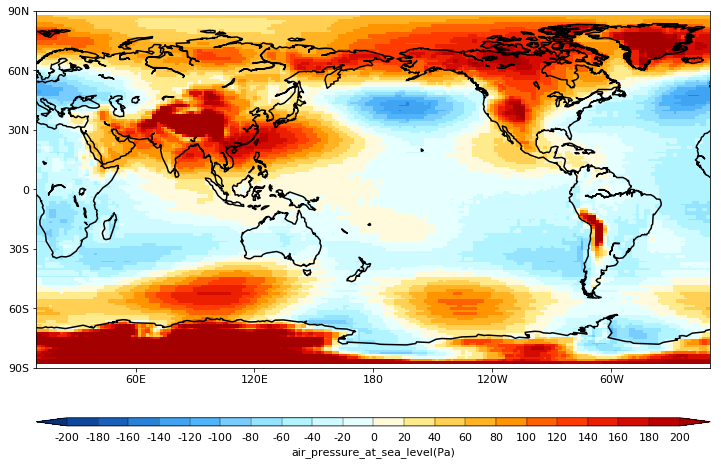

In [9]:
cfp.mapset(lonmin=-350, lonmax=-10, latmin=-90, latmax=90)
cfp.levs(min=-200,max=200,step=20)
cfp.con(slp_asia_diff, blockfill=True, lines=False)

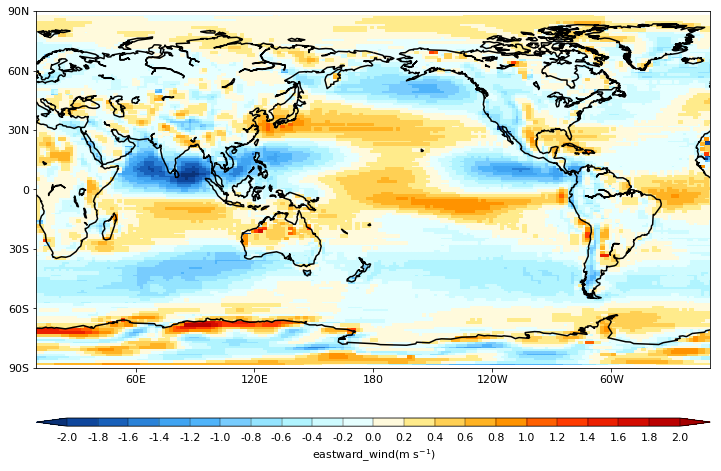

In [10]:
cfp.mapset(lonmin=-350, lonmax=-10, latmin=-90, latmax=90)
cfp.levs(min=-2,max=2,step=0.2)
cfp.con(ua_asia_diff, blockfill=True, lines=False)

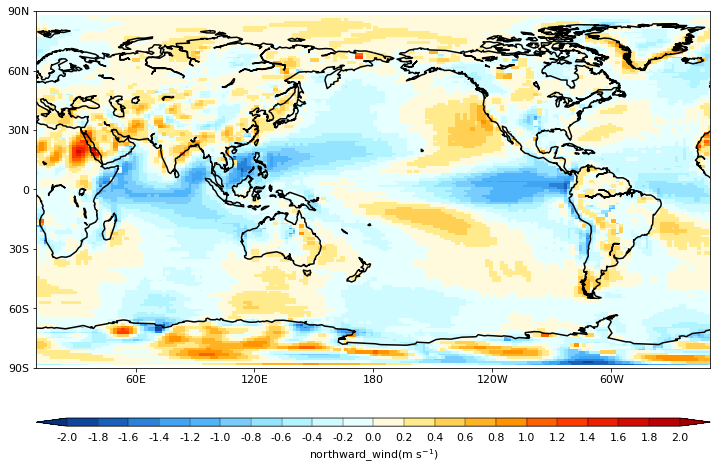

In [13]:
cfp.mapset(lonmin=-350, lonmax=-10, latmin=-90, latmax=90)
cfp.levs(min=-2,max=2,step=0.2)
cfp.con(va_asia_diff, blockfill=True, lines=False)